In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.ensemble import IsolationForest
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

/home/krisub/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Week 5 (Sept 16 - Sept 22):
- Feature selection: Choose the most relevant features based on EDA
- Create new features based on video metadata, early engagement metrics, etc.

### Week 6 (Sept 23 - Sept 29):
- Refine and finalize the feature set for model training
- Document the feature engineering process in a Markdown file

### Deliverables
- Jupyter Notebook: Feature engineering code, including creation and selection of features

### TODO
- PPT slides on findings from EDA, potential features

In [2]:
cleaned_df = pd.read_csv('cleaned_df.csv', lineterminator='\n')

In [3]:
cleaned_df

video_id                                              title  \
0       3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1       M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2       J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3       kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4       VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   
...             ...                                                ...   
264150  4-uXvx5M7XA  Total solar eclipse causing tourism boost acro...   
264151  aFsfJYWpqII  Food Delivery Apps: Last Week Tonight with Joh...   
264152  pRAsQss17xs  12 Things NO-ONE Tells You About Japan | Feat....   
264153  84QeCD7y_Ds                          Buying My Dream Car At 21   
264154  SBTA3Tegacs                       Murder Drones Training Video   

                      publishedAt                 channelId  \
0       2020-08-11 19:20:14+00:00  UCvtRTOMP2TqYqu51xNrqAzg   
1       2020-08-11 17:00:10+00:00  UC0ZV6M2THA81QT9hrVWJG3A   
2       2020-08-11 16:34:06+00:00  UCYzPXprvl5Y-Sf0g4vX-m6g   
3       2020-08-11 16:38:55+00:00  UCbg_UMjlHJg_19SZckaKajg   
4       2020-08-11 15:10:05+00:00  UCDVPcEbVLQgLZX0Rt6jo34A   
...                           ...                       ...   
264150  2024-04-08 15:55:44+00:00  UClwddNv0Cr6SIEGkzVK886w   
264151  2024-04-04 11:00:02+00:00  UC3XTzVzaHQEd30rQbuvCtTQ   
264152  2024-04-07 14:53:25+00:00  UCHL9bfHTxCMi-7vfxQ-AYtg   
264153  2024-04-07 18:00:03+00:00  UChQ-d14tHB62nskossxO0tw   
264154  2024-04-05 19:00:12+00:00  UCn_FAXem2-e3HQvmK-mOH4g   

                      channelTitle     category_name  categoryId  \
0                         Brawadis     Videoblogging          22   
1                     Apex Legends            Gaming          20   
2                    jacksepticeye     Entertainment          24   
3                              XXL             Music          10   
4                         Mr. Kate     Howto & Style          26   
...                            ...               ...         ...   
264150  FOX 9 Minneapolis-St. Paul   News & Politics          25   
264151             LastWeekTonight     Entertainment          24   
264152             Abroad in Japan     Entertainment          24   
264153                   Joe Fazer     Entertainment          24   
264154                      GLITCH  Film & Animation           1   

                    trending_date  \
0       2020-08-12 00:00:00+00:00   
1       2020-08-12 00:00:00+00:00   
2       2020-08-12 00:00:00+00:00   
3       2020-08-12 00:00:00+00:00   
4       2020-08-12 00:00:00+00:00   
...                           ...   
264150  2024-04-15 00:00:00+00:00   
264151  2024-04-15 00:00:00+00:00   
264152  2024-04-15 00:00:00+00:00   
264153  2024-04-15 00:00:00+00:00   
264154  2024-04-15 00:00:00+00:00   

                                                     tags  view_count  ...  \
0       brawadis|prank|basketball|skits|ghost|funny vi...     1514614  ...   
1       Apex Legends|Apex Legends characters|new Apex ...     2381688  ...   
2       jacksepticeye|funny|funny meme|memes|jacksepti...     2038853  ...   
3       xxl freshman|xxl freshmen|2020 xxl freshman|20...      496771  ...   
4       The LaBrant Family|DIY|Interior Design|Makeove...     1123889  ...   
...                                                   ...         ...  ...   
264150  morning-news|Eclipses|travel|travel news|weath...      359130  ...   
264151                                             [None]     3998181  ...   
264152          japan|cdawgva|abroad in japan|trash taste      873960  ...   
264153  gym|youtube|bodybuilder|powerlifter|vlog|vlogg...      535842  ...   
264154  meta runner|glitch productions|funny|video gam...     3073412  ...   

                                              description  publishedAt_year  \
0       SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...              2020   
1       

#### How to deal with duplicate video IDs?

Idea: Group data by video_id and analyze how view_count, likes, comment_count change over time.

Possible trends to calculate:
- growth rate
- percentage increase/cumulative engagement over time

In [4]:
cleaned_df = cleaned_df.sort_values(by=['video_id', 'publishedAt'])
cleaned_df

video_id                                              title  \
60125   --14w5SOEUs                                  Migos - Avalanche   
60320   --14w5SOEUs                 Migos - Avalanche (Official Video)   
60523   --14w5SOEUs                 Migos - Avalanche (Official Video)   
60720   --14w5SOEUs                 Migos - Avalanche (Official Video)   
60923   --14w5SOEUs                 Migos - Avalanche (Official Video)   
...             ...                                                ...   
217218  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
217449  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
217702  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
217933  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
218163  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   

                      publishedAt                 channelId   channelTitle  \
60125   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60320   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60523   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60720   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60923   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
...                           ...                       ...            ...   
217218  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
217449  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
217702  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
217933  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
218163  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   

       category_name  categoryId              trending_date  \
60125          Music          10  2021-06-11 00:00:00+00:00   
60320          Music          10  2021-06-11 00:00:00+00:00   
60523          Music          10  2021-06-12 00:00:00+00:00   
60720          Music          10  2021-06-12 00:00:00+00:00   
60923          Music          10  2021-06-13 00:00:00+00:00   
...              ...         ...                        ...   
217218        Comedy          23  2023-08-23 00:00:00+00:00   
217449        Comedy          23  2023-08-24 00:00:00+00:00   
217702        Comedy          23  2023-08-25 00:00:00+00:00   
217933        Comedy          23  2023-08-26 00:00:00+00:00   
218163        Comedy          23  2023-08-27 00:00:00+00:00   

                                                     tags  view_count  ...  \
60125   Migos|Avalanche|Quality|Control|Music/Motown|R...     1076217  ...   
60320   Migos|Avalanche|Quality|Control|Music/Motown|R...     2146104  ...   
60523   Migos|Avalanche|Quality|Control|Music/Motown|R...     3317372  ...   
60720   Migos|Avalanche|Quality|Control|Music/Motown|R...     3963014  ...   
60923   Migos|Avalanche|Quality|Control|Music/Motown|R...     4690242  ...   
...                                                   ...         ...  ...   
217218  kurtis conner|commentary|movie review|alpha|fa...     1931660  ...   
217449  kurtis conner|commentary|movie review|alpha|fa...     2065523  ...   
217702  kurtis conner|commentary|movie review|alpha|fa...     2166594  ...   
217933  kurtis conner|commentary|movie review|alpha|fa...     2243419  ...   
218163  kurtis conner|commentary|movie review|alpha|fa...     2306803  ...   

                                              description  publishedAt_year  \
60125   Music video by Migos performing Avalanche. Qua...              2021   
60320   Watch the the official video for Migos - Avala...              2021   
60523   Watch the the official video for Migos - Avala...              2021   
60720   Watch the the official video for Migos - Avala...              2021   
60923   Watch the the official video for Migos - Avala...              2021   
...              

In [5]:
# df grouped by video id so we can see increase in certain engagement metrics over time

cleaned_df['view_count_diff'] = cleaned_df.groupby('video_id')['view_count'].diff().fillna(0)
cleaned_df['likes_diff'] = cleaned_df.groupby('video_id')['likes'].diff().fillna(0)
cleaned_df['comment_count_diff'] = cleaned_df.groupby('video_id')['comment_count'].diff().fillna(0)
cleaned_df

video_id                                              title  \
60125   --14w5SOEUs                                  Migos - Avalanche   
60320   --14w5SOEUs                 Migos - Avalanche (Official Video)   
60523   --14w5SOEUs                 Migos - Avalanche (Official Video)   
60720   --14w5SOEUs                 Migos - Avalanche (Official Video)   
60923   --14w5SOEUs                 Migos - Avalanche (Official Video)   
...             ...                                                ...   
217218  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
217449  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
217702  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
217933  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
218163  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   

                      publishedAt                 channelId   channelTitle  \
60125   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60320   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60523   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60720   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60923   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
...                           ...                       ...            ...   
217218  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
217449  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
217702  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
217933  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
218163  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   

       category_name  categoryId              trending_date  \
60125          Music          10  2021-06-11 00:00:00+00:00   
60320          Music          10  2021-06-11 00:00:00+00:00   
60523          Music          10  2021-06-12 00:00:00+00:00   
60720          Music          10  2021-06-12 00:00:00+00:00   
60923          Music          10  2021-06-13 00:00:00+00:00   
...              ...         ...                        ...   
217218        Comedy          23  2023-08-23 00:00:00+00:00   
217449        Comedy          23  2023-08-24 00:00:00+00:00   
217702        Comedy          23  2023-08-25 00:00:00+00:00   
217933        Comedy          23  2023-08-26 00:00:00+00:00   
218163        Comedy          23  2023-08-27 00:00:00+00:00   

                                                     tags  view_count  ...  \
60125   Migos|Avalanche|Quality|Control|Music/Motown|R...     1076217  ...   
60320   Migos|Avalanche|Quality|Control|Music/Motown|R...     2146104  ...   
60523   Migos|Avalanche|Quality|Control|Music/Motown|R...     3317372  ...   
60720   Migos|Avalanche|Quality|Control|Music/Motown|R...     3963014  ...   
60923   Migos|Avalanche|Quality|Control|Music/Motown|R...     4690242  ...   
...                                                   ...         ...  ...   
217218  kurtis conner|commentary|movie review|alpha|fa...     1931660  ...   
217449  kurtis conner|commentary|movie review|alpha|fa...     2065523  ...   
217702  kurtis conner|commentary|movie review|alpha|fa...     2166594  ...   
217933  kurtis conner|commentary|movie review|alpha|fa...     2243419  ...   
218163  kurtis conner|commentary|movie review|alpha|fa...     2306803  ...   

        publishedAt_date  publishedAt_time  trendingDate_year  \
60125                 10          16:00:00               2021   
60320                 10          16:00:00               2021   
60523                 10          16:00:00               2021   
60720                 10          16:00:00               2021   
60923                 10          16:00:00               2021   
...                  ...               ...                ...   
217218                19          19

In [6]:
# df aggregated -- we lose info of changes over time

aggregated_df = cleaned_df.groupby('video_id').agg({
    'view_count': 'max',
    'title': 'max',
    'likes': 'max',
    'comment_count': 'max',
    'publishedAt': 'min'  # earliest published date
}).reset_index()
aggregated_df

video_id  view_count  \
0      --14w5SOEUs     6823249   
1      --40TEbZ9Is      682609   
2      --47FjCWgrU     1940781   
3      --5-brQiQFg     1280997   
4      --DKkzWVh-E      623949   
...            ...         ...   
46234  zzd4ydafGR0    13974461   
46235  zziBybeSAtw     2598512   
46236  zzk09ESX7e0     9389223   
46237  zzsIqPVv2Q4     3079200   
46238  zzvtP3jMIME     2306803   

                                                   title   likes  \
0                     Migos - Avalanche (Official Video)  262692   
1             Supporting Actress in a Comedy: 73rd Emmys    8029   
2      San Francisco 49ers vs. Arizona Cardinals Game...   22612   
3      Washington Commanders vs. San Francisco 49ers ...   14603   
4                           Why Retaining Walls Collapse   29991   
...                                                  ...     ...   
46234  Lil Tjay - Calling My Phone (feat. 6LACK) [Off...  728439   
46235  PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...   20024   
46236              [MV] 마마무 (MAMAMOO) - Where Are We Now  584431   
46237  I Survived 100 DAYS as a SLIME in HARDCORE Min...   70776   
46238  I Watched the Worst Movie on the Most Disliked...  174985   

       comment_count                publishedAt  
0              16445  2021-06-10 16:00:00+00:00  
1                723  2021-09-20 01:03:32+00:00  
2               2018  2023-12-18 00:21:58+00:00  
3               2078  2022-12-25 00:30:17+00:00  
4                998  2021-12-07 13:00:00+00:00  
...              ...                        ...  
46234          57012  2021-02-12 05:03:49+00:00  
46235           2872  2021-01-16 05:39:05+00:00  
46236          77267  2021-06-02 09:00:10+00:00  
46237           2061  2022-04-29 21:45:01+00:00  
46238           7512  2023-08-19 19:00:01+00:00  

[46239 rows x 6 columns]

In [7]:
# calculating rate of change for engagement metrics
# using pct change: fractional change from immediately previous row
cleaned_df['view_count_growth_rate'] = cleaned_df.groupby('video_id')['view_count'].pct_change().fillna(0)
cleaned_df['likes_growth_rate'] = cleaned_df.groupby('video_id')['likes'].pct_change().fillna(0)
cleaned_df['comment_count_growth_rate'] = cleaned_df.groupby('video_id')['comment_count'].pct_change().fillna(0)
cleaned_df

video_id                                              title  \
60125   --14w5SOEUs                                  Migos - Avalanche   
60320   --14w5SOEUs                 Migos - Avalanche (Official Video)   
60523   --14w5SOEUs                 Migos - Avalanche (Official Video)   
60720   --14w5SOEUs                 Migos - Avalanche (Official Video)   
60923   --14w5SOEUs                 Migos - Avalanche (Official Video)   
...             ...                                                ...   
217218  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
217449  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
217702  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
217933  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   
218163  zzvtP3jMIME  I Watched the Worst Movie on the Most Disliked...   

                      publishedAt                 channelId   channelTitle  \
60125   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60320   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60523   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60720   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
60923   2021-06-10 16:00:00+00:00  UCGIelM2Dj3zza3xyV3pL3WQ      MigosVEVO   
...                           ...                       ...            ...   
217218  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
217449  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
217702  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
217933  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   
218163  2023-08-19 19:00:01+00:00  UC7zsxKqd5MicTf4VhS9Y74g  Kurtis Conner   

       category_name  categoryId              trending_date  \
60125          Music          10  2021-06-11 00:00:00+00:00   
60320          Music          10  2021-06-11 00:00:00+00:00   
60523          Music          10  2021-06-12 00:00:00+00:00   
60720          Music          10  2021-06-12 00:00:00+00:00   
60923          Music          10  2021-06-13 00:00:00+00:00   
...              ...         ...                        ...   
217218        Comedy          23  2023-08-23 00:00:00+00:00   
217449        Comedy          23  2023-08-24 00:00:00+00:00   
217702        Comedy          23  2023-08-25 00:00:00+00:00   
217933        Comedy          23  2023-08-26 00:00:00+00:00   
218163        Comedy          23  2023-08-27 00:00:00+00:00   

                                                     tags  view_count  ...  \
60125   Migos|Avalanche|Quality|Control|Music/Motown|R...     1076217  ...   
60320   Migos|Avalanche|Quality|Control|Music/Motown|R...     2146104  ...   
60523   Migos|Avalanche|Quality|Control|Music/Motown|R...     3317372  ...   
60720   Migos|Avalanche|Quality|Control|Music/Motown|R...     3963014  ...   
60923   Migos|Avalanche|Quality|Control|Music/Motown|R...     4690242  ...   
...                                                   ...         ...  ...   
217218  kurtis conner|commentary|movie review|alpha|fa...     1931660  ...   
217449  kurtis conner|commentary|movie review|alpha|fa...     2065523  ...   
217702  kurtis conner|commentary|movie review|alpha|fa...     2166594  ...   
217933  kurtis conner|commentary|movie review|alpha|fa...     2243419  ...   
218163  kurtis conner|commentary|movie review|alpha|fa...     2306803  ...   

        trendingDate_month  trendingDate_date  \
60125                    6                 11   
60320                    6                 11   
60523                    6                 12   
60720                    6                 12   
60923                    6                 13   
...                    ...                ...   
217218                   8                 23   
217449                   8                 24   
217702                   8                 25   
2

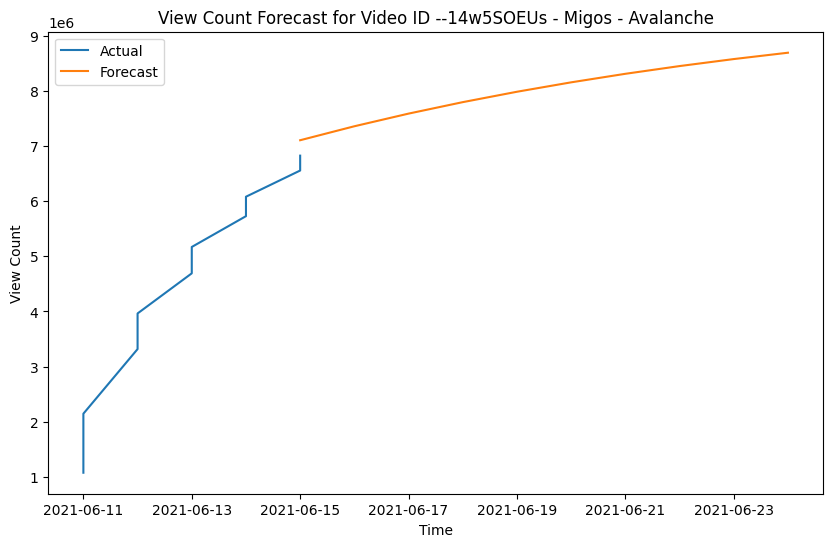

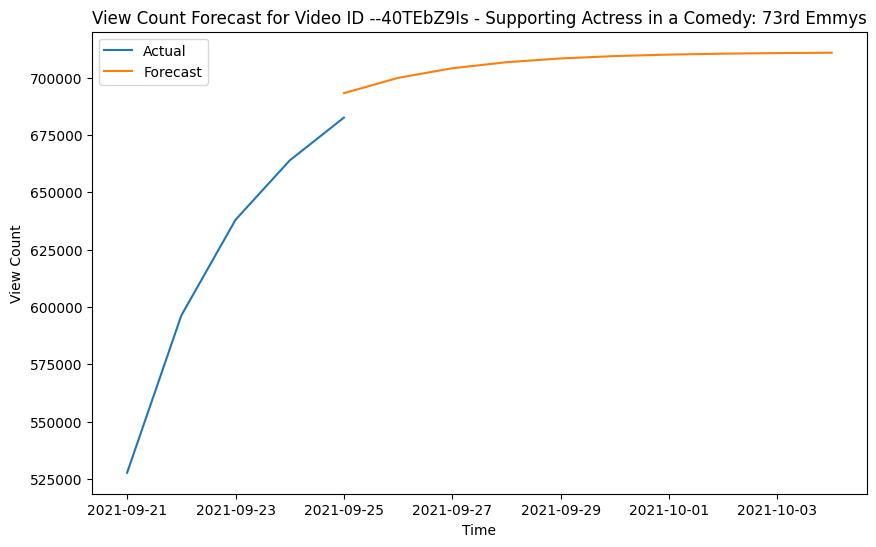

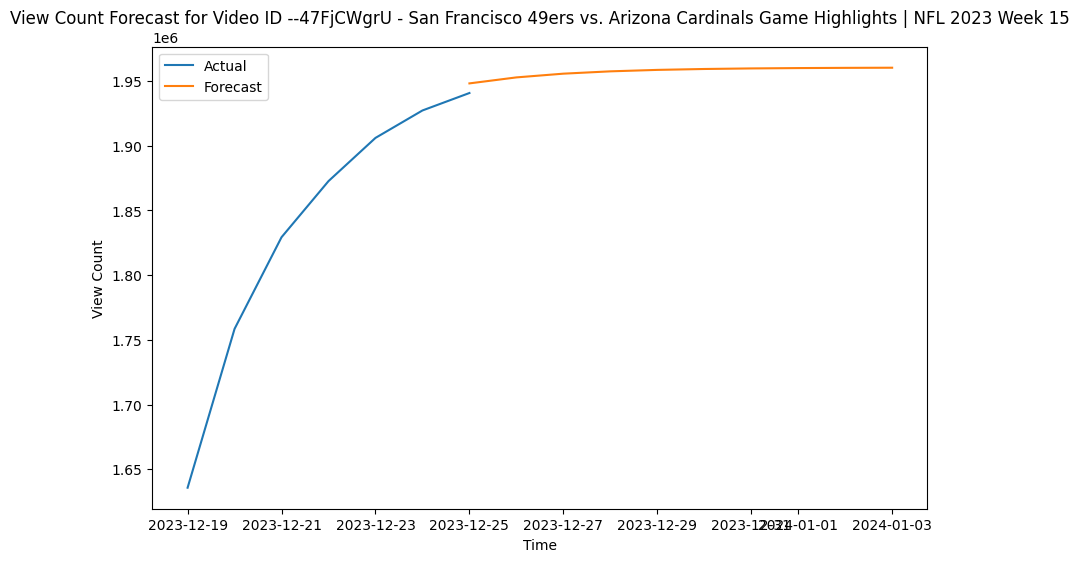

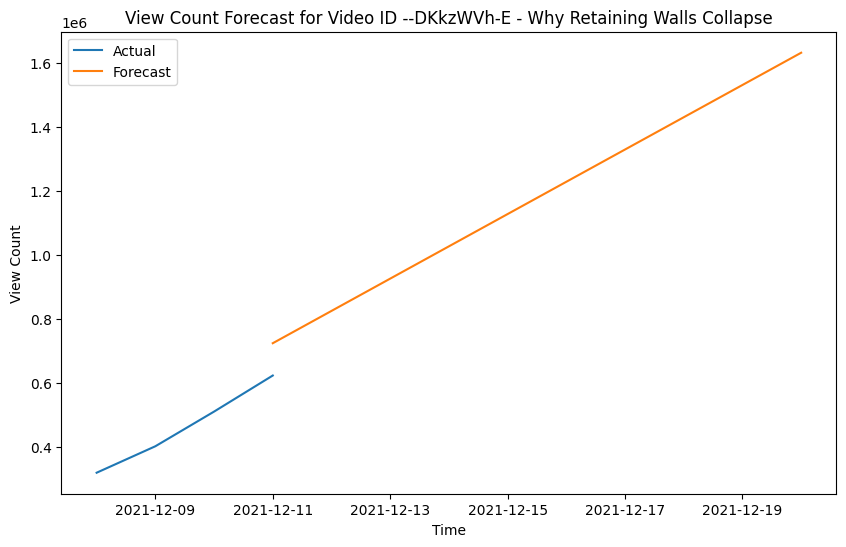

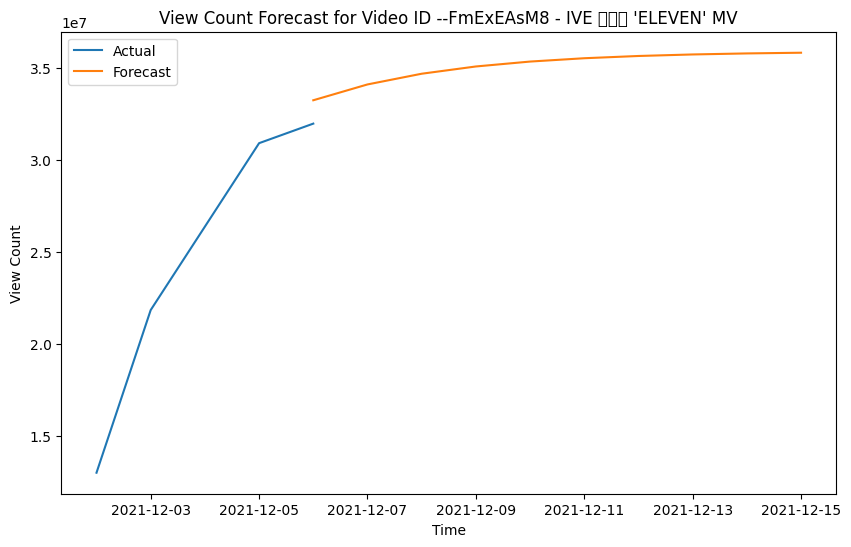

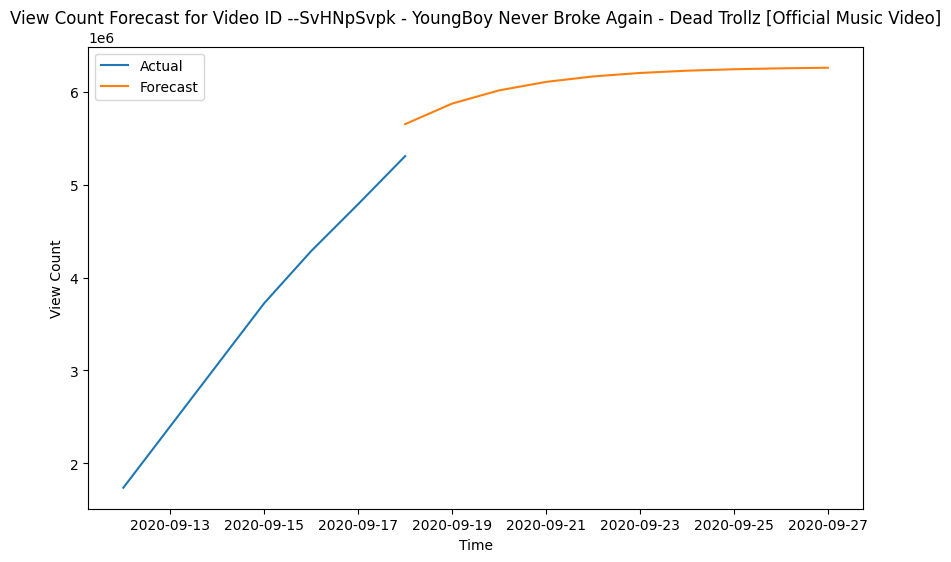

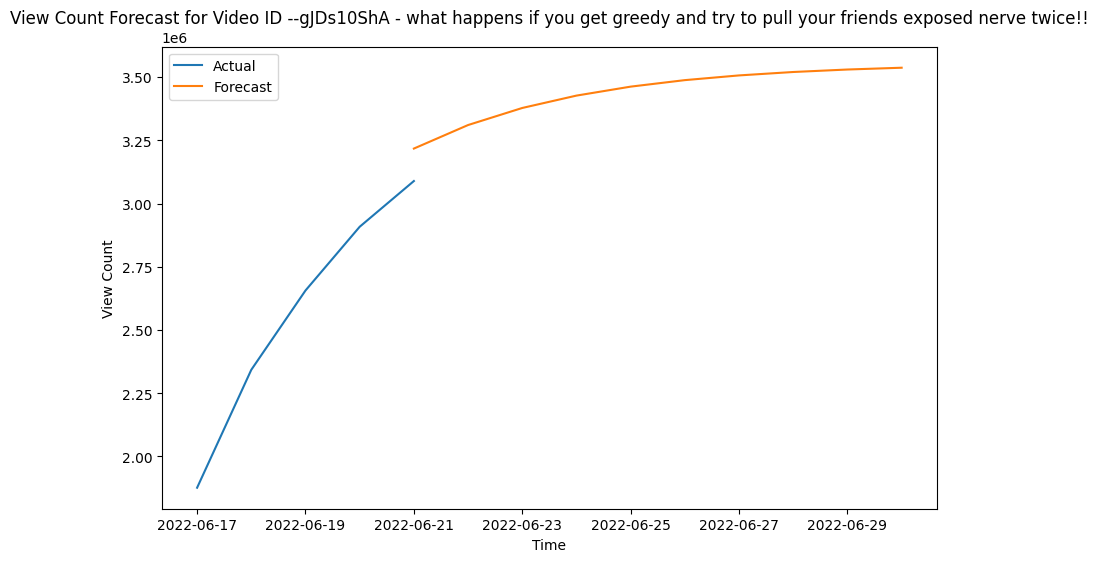

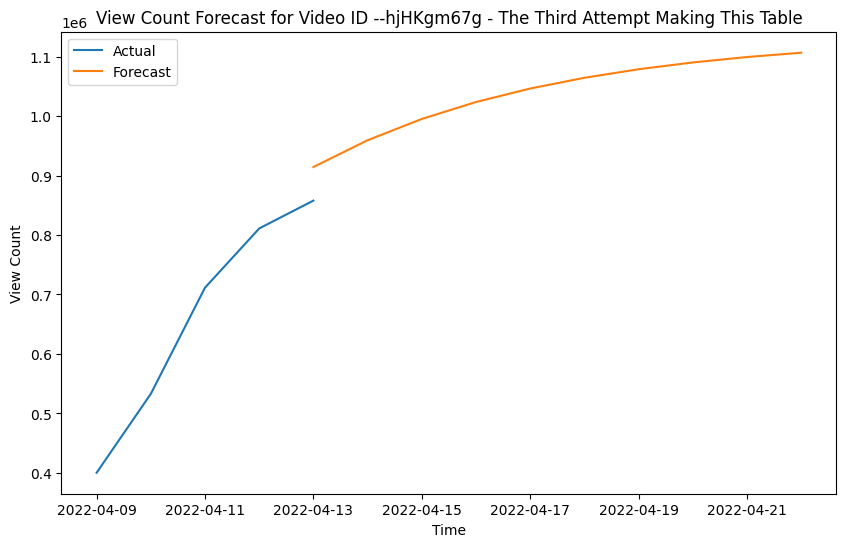

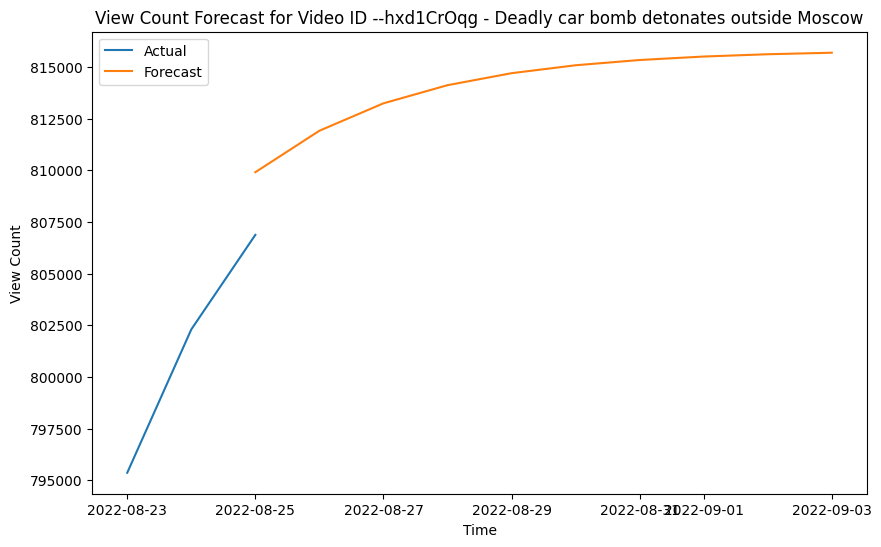

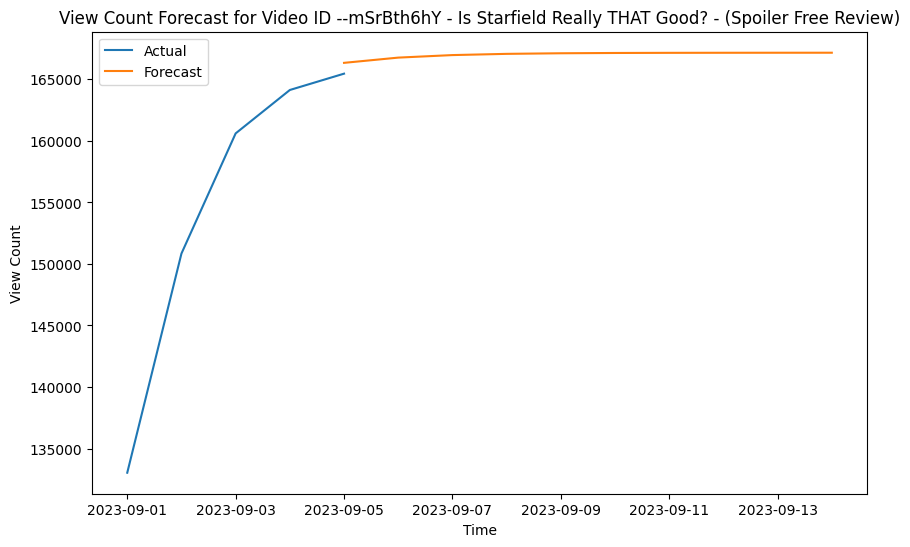

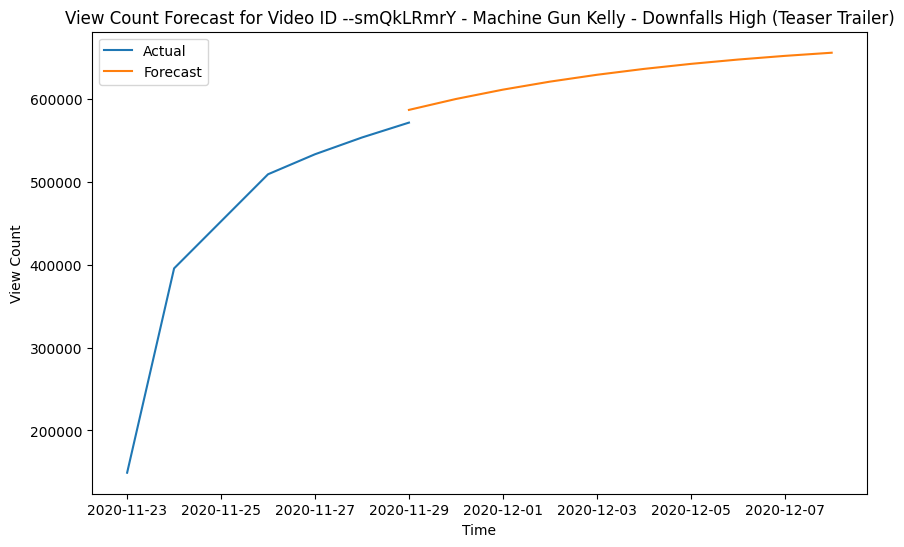

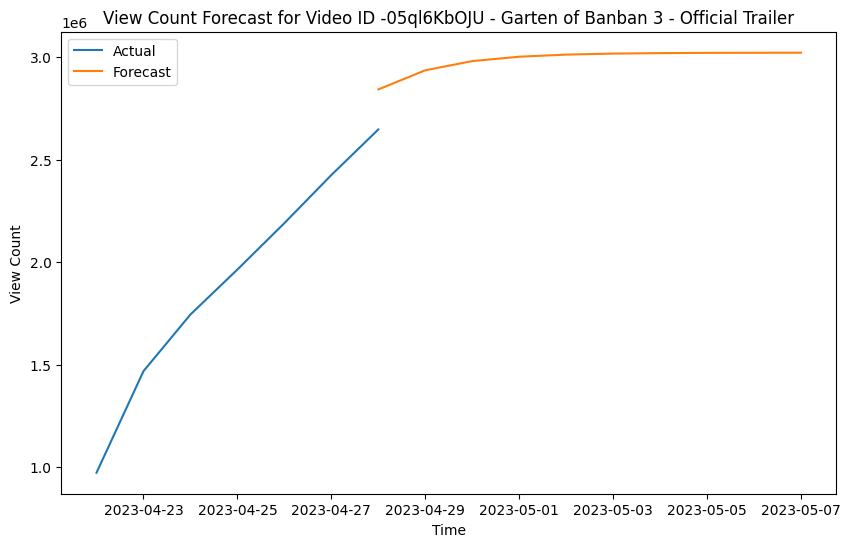

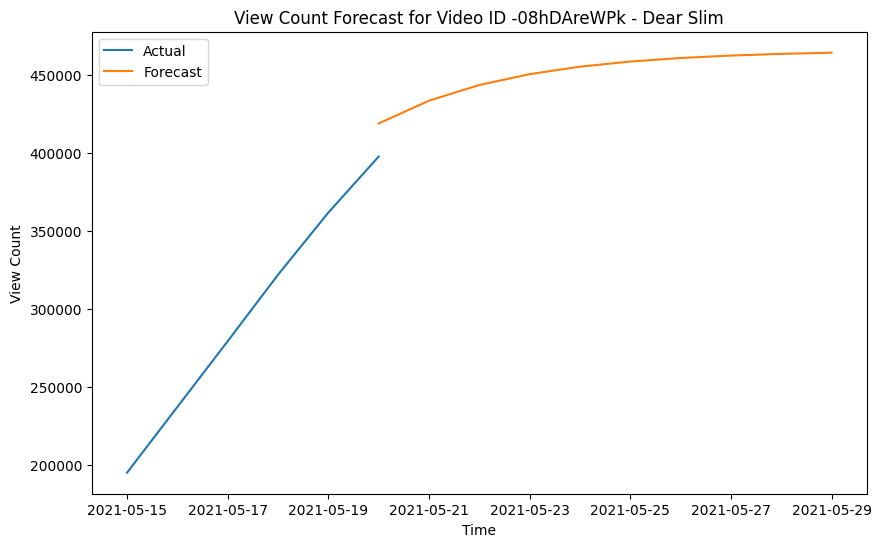

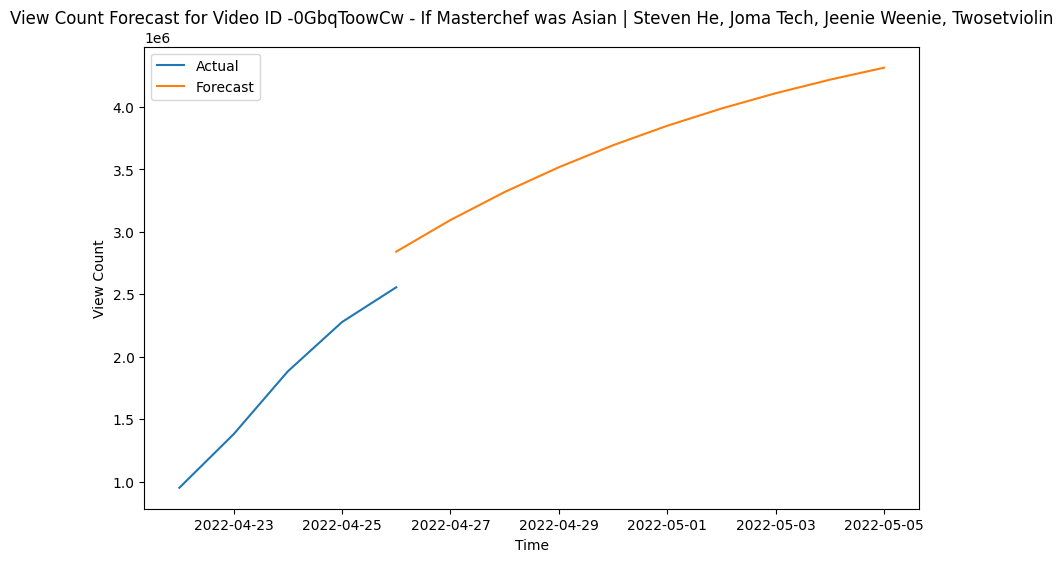

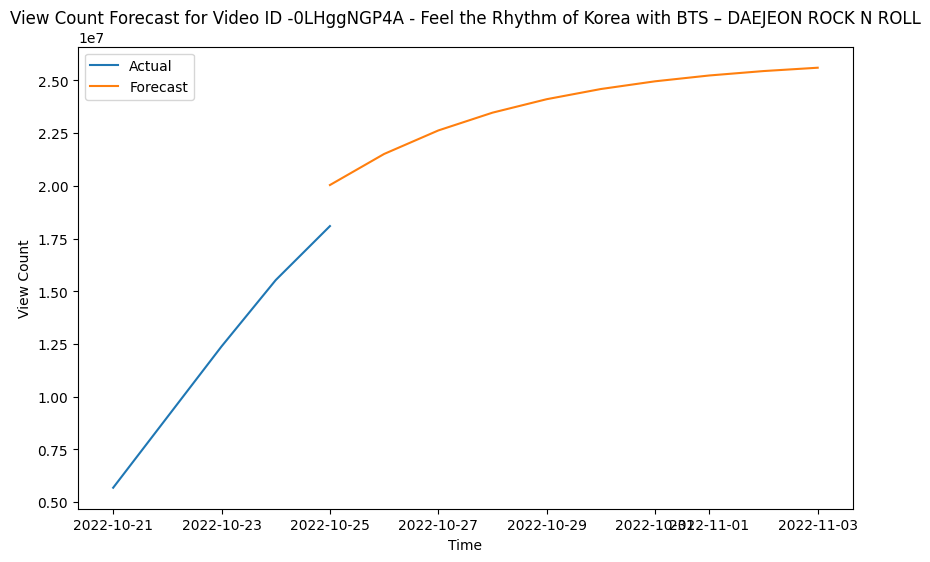

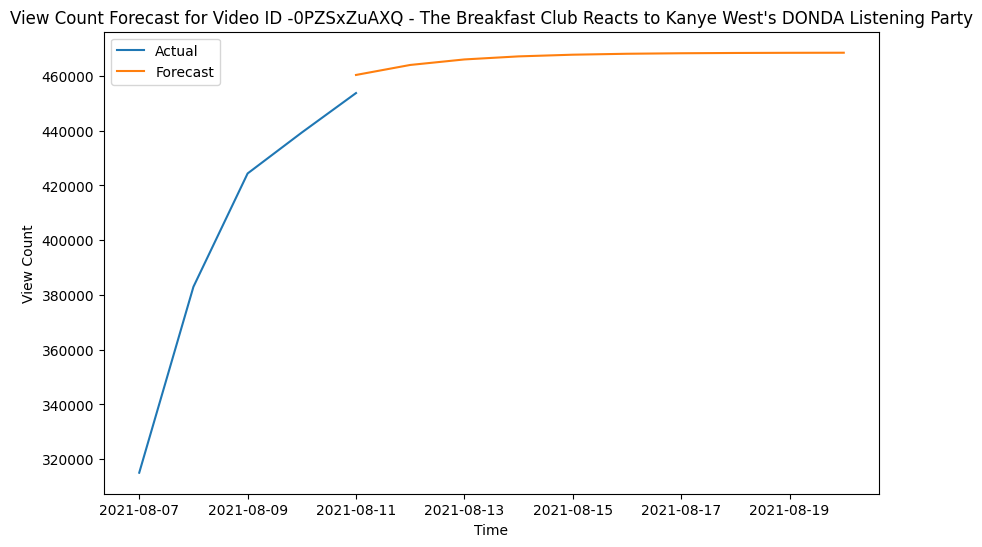

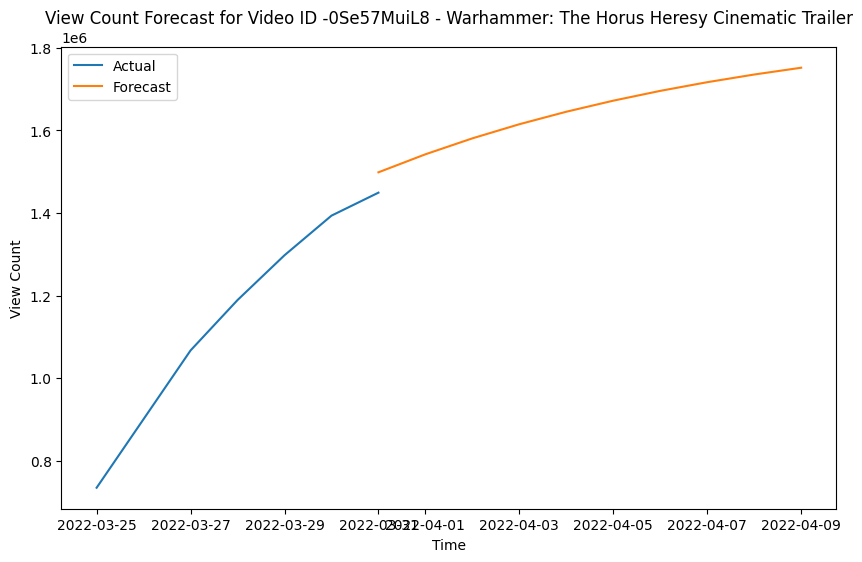

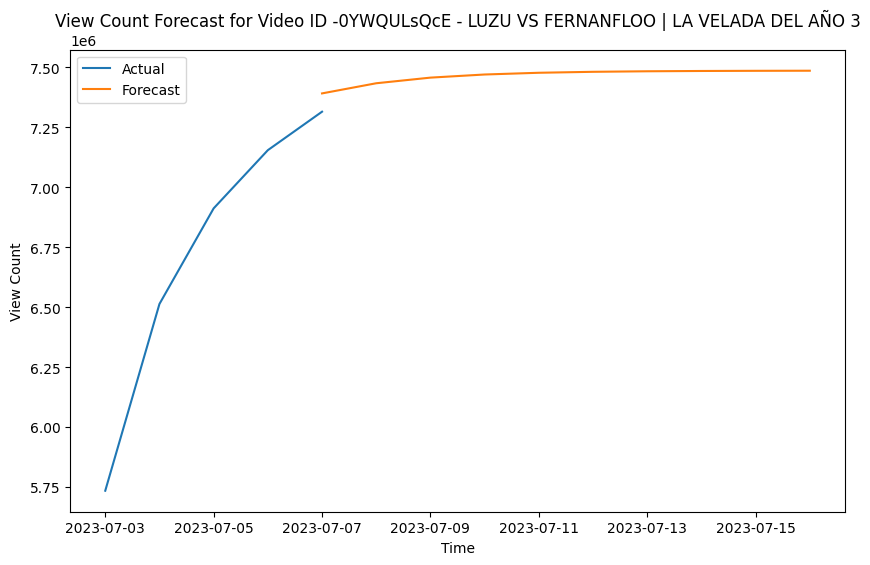

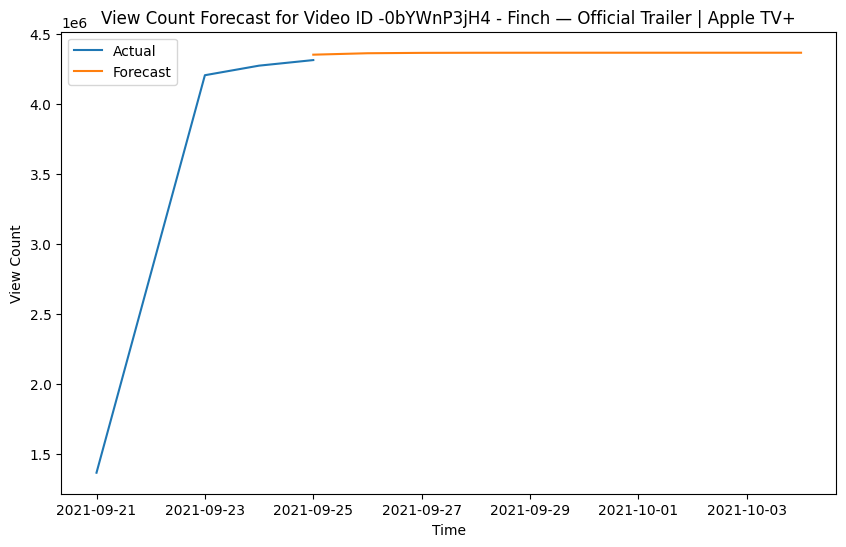

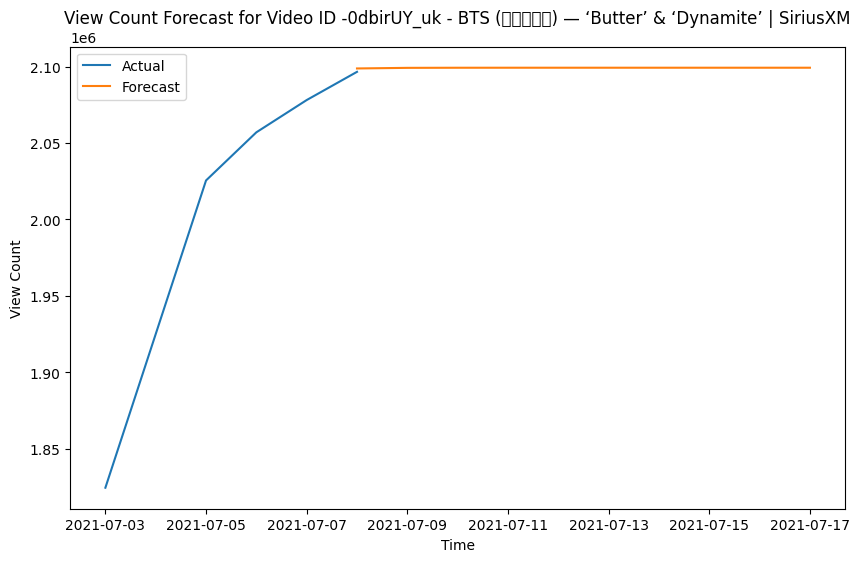

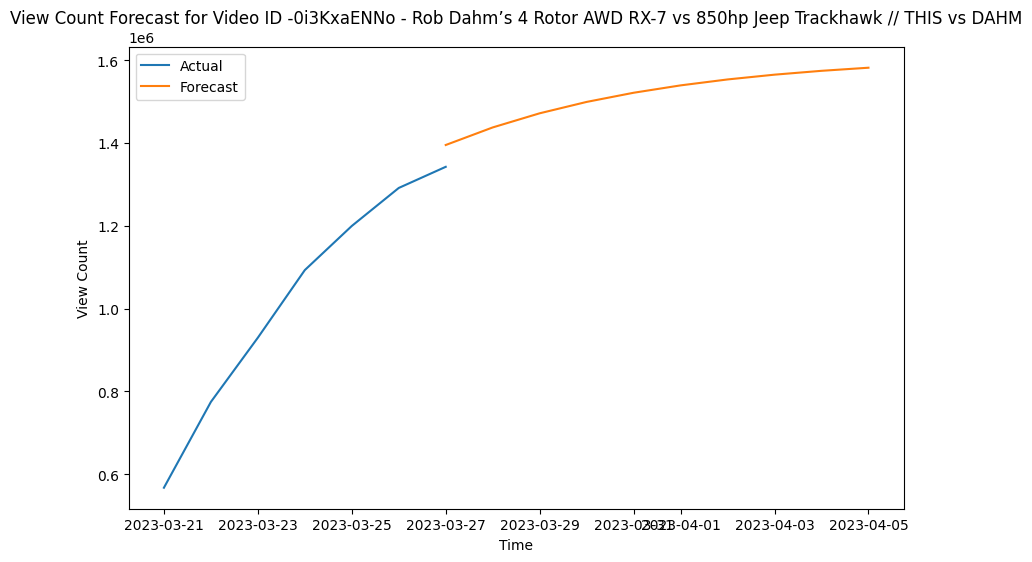

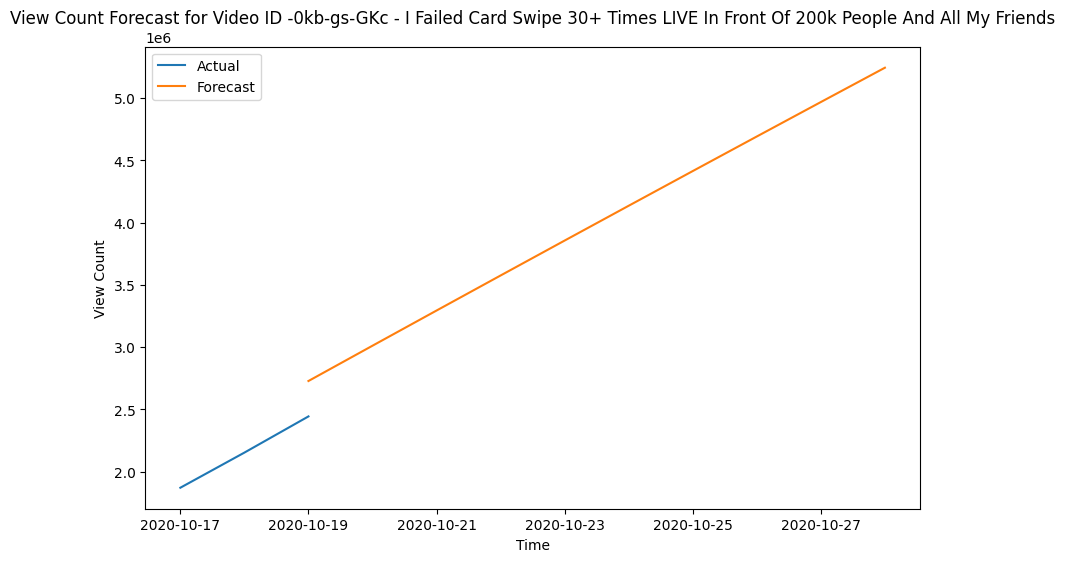

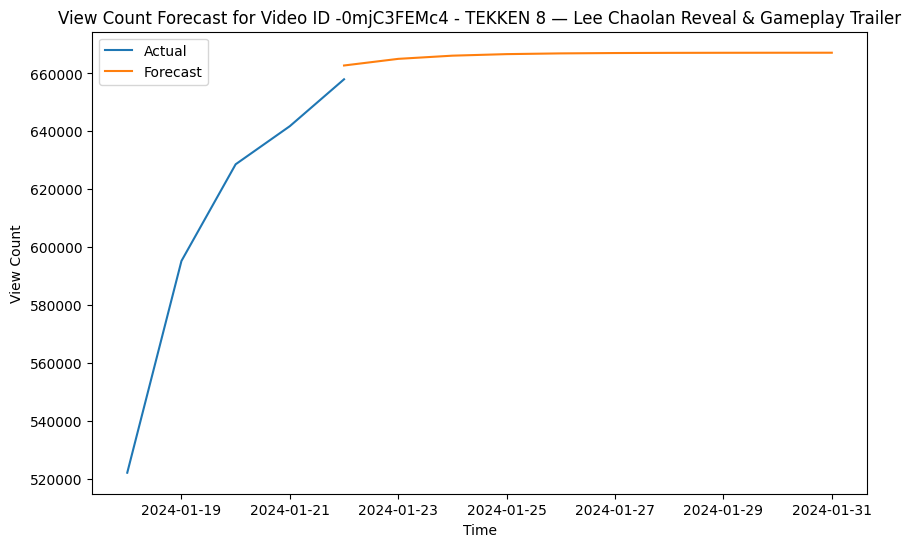

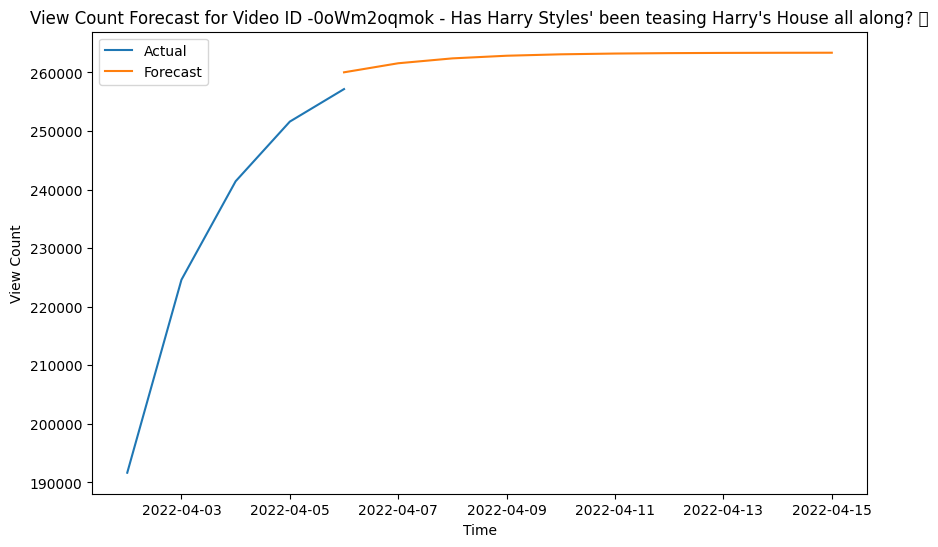

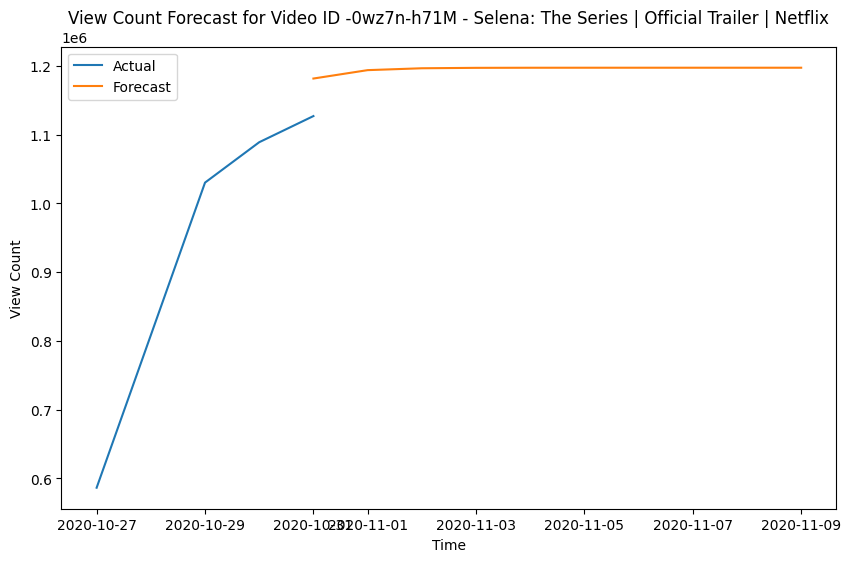

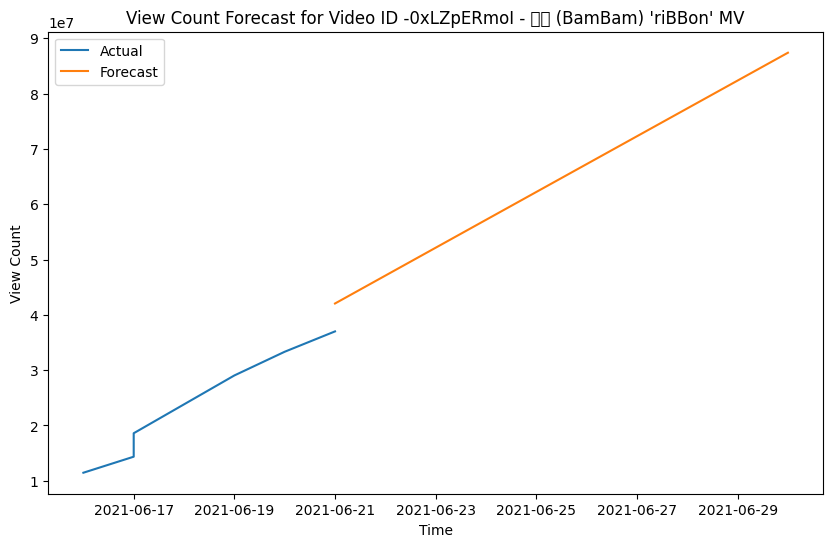

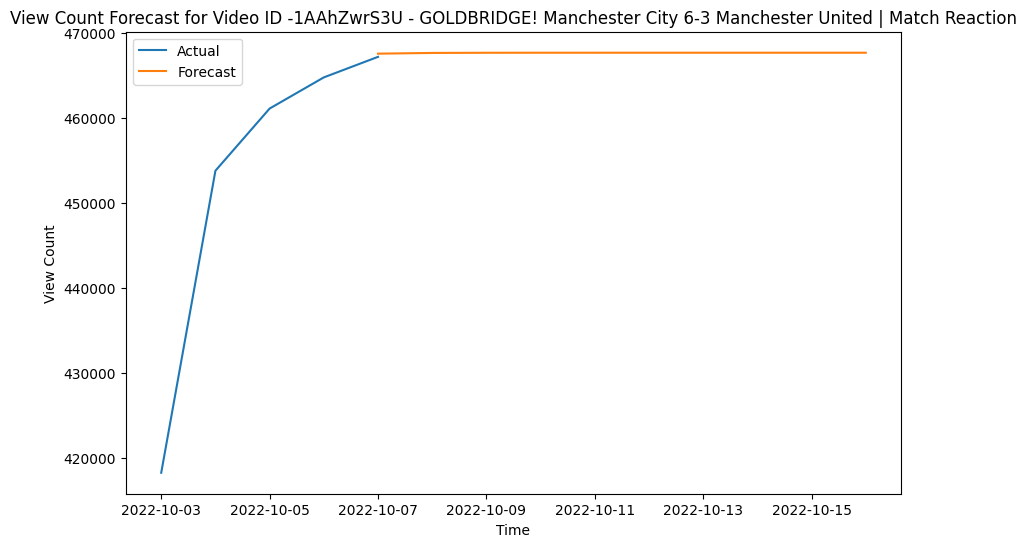

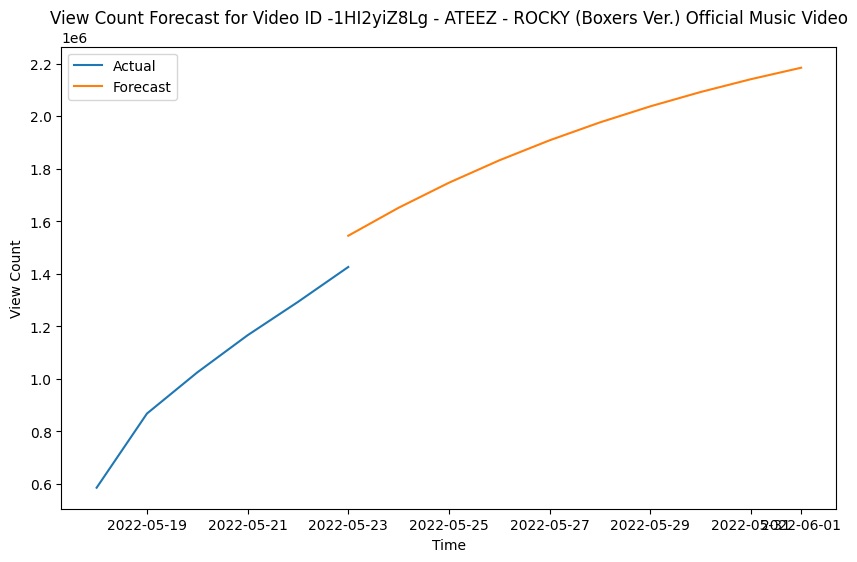

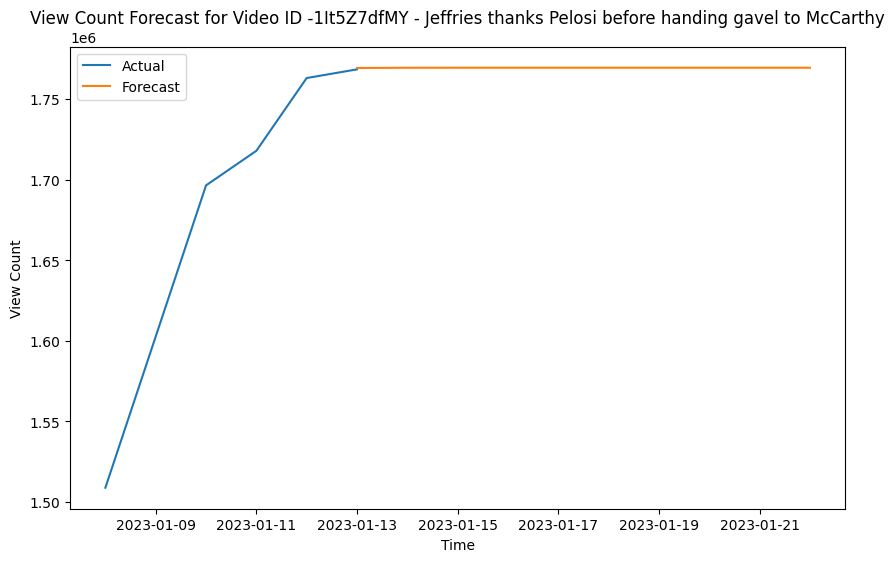

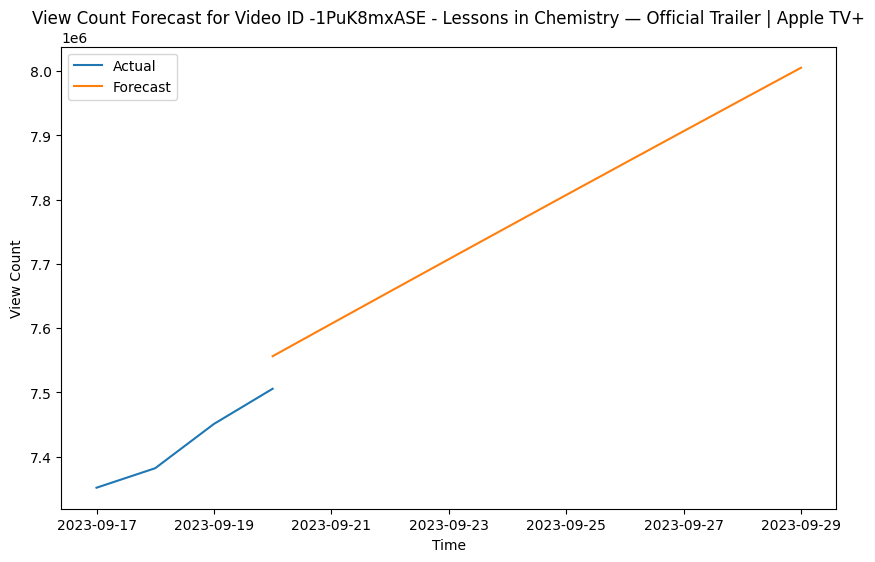

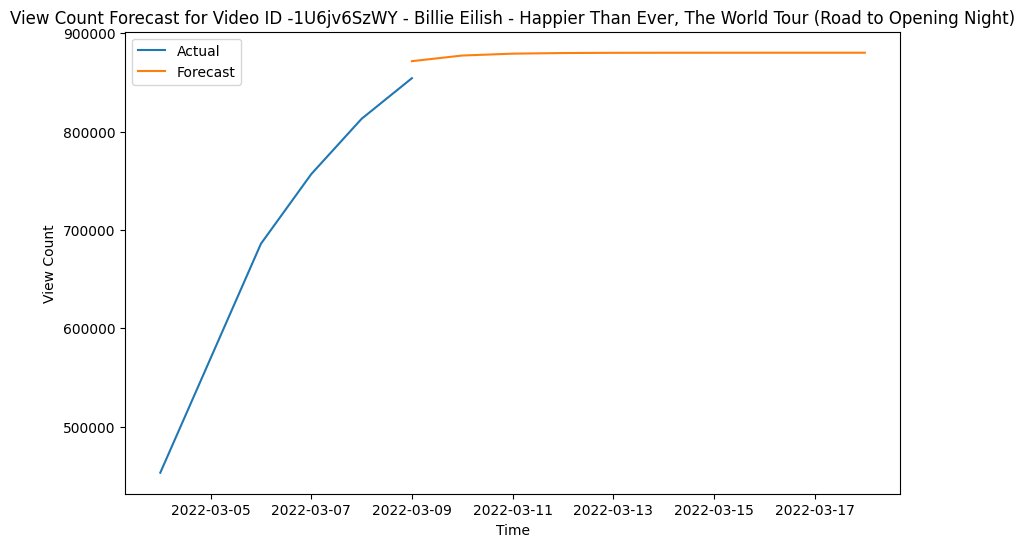

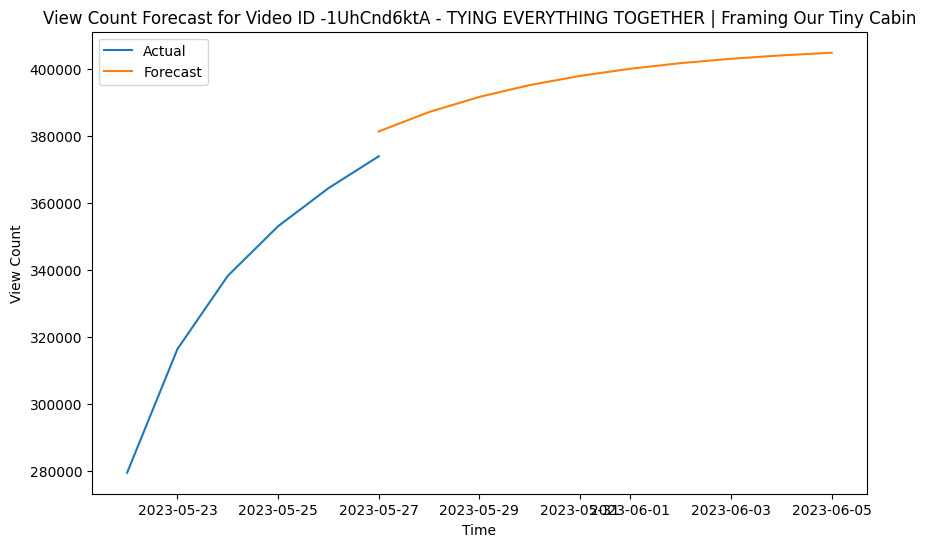

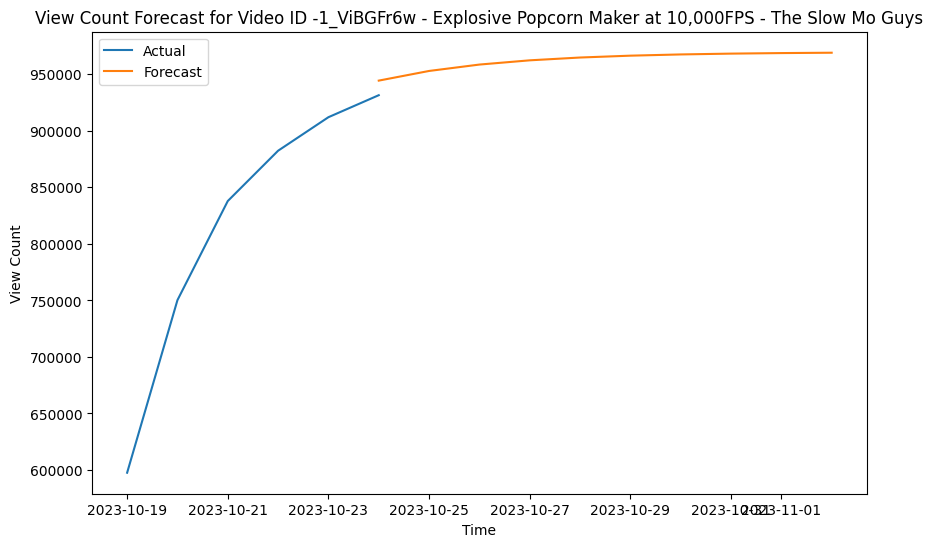

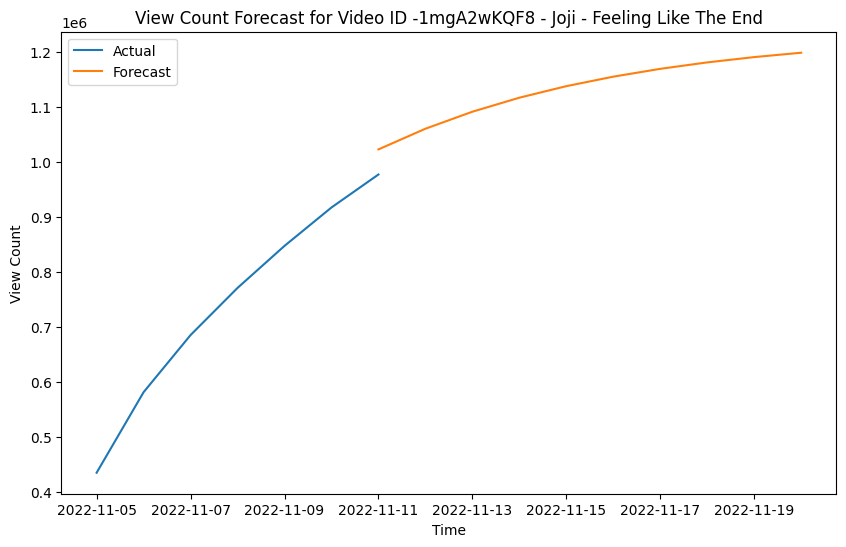

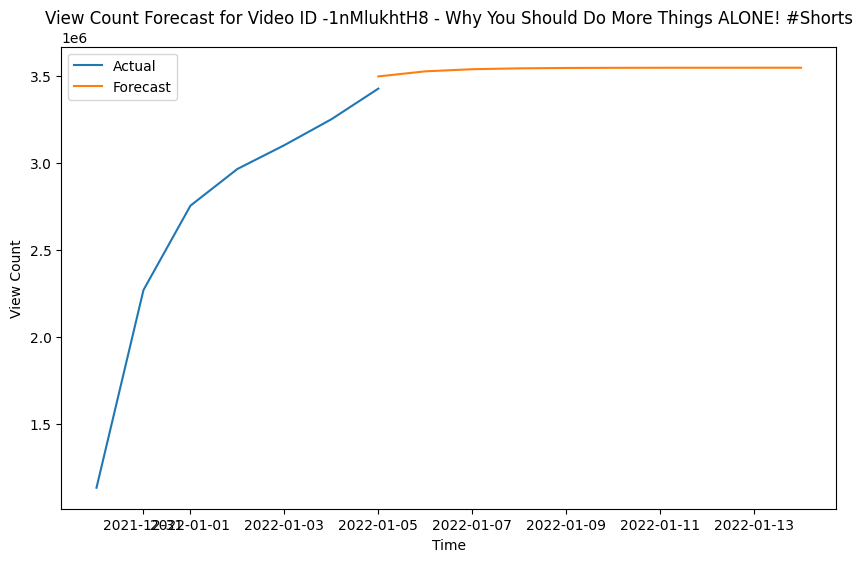

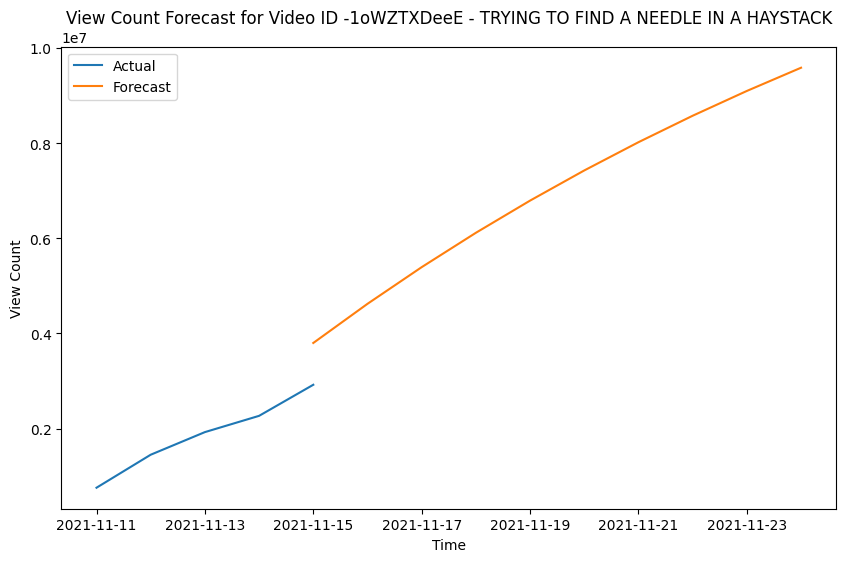

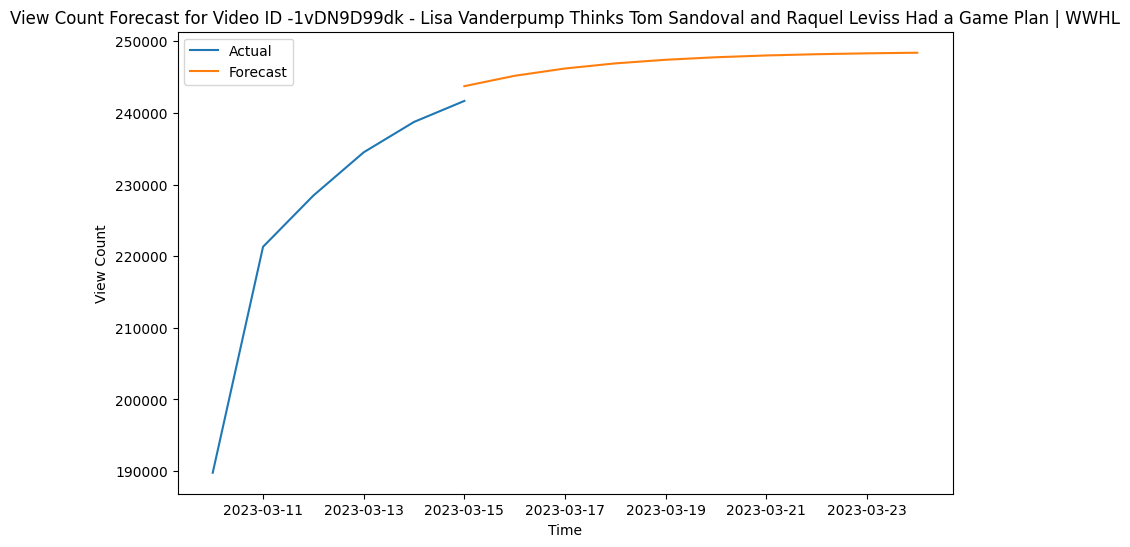

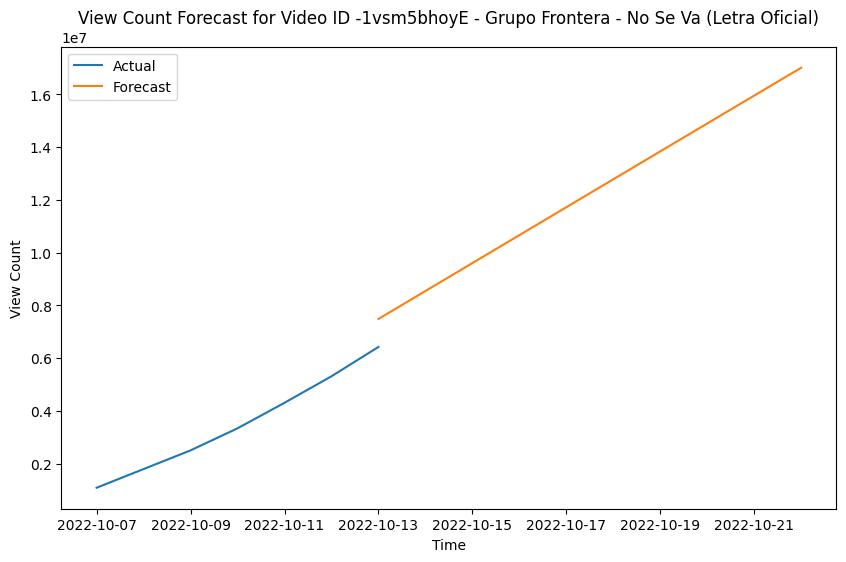

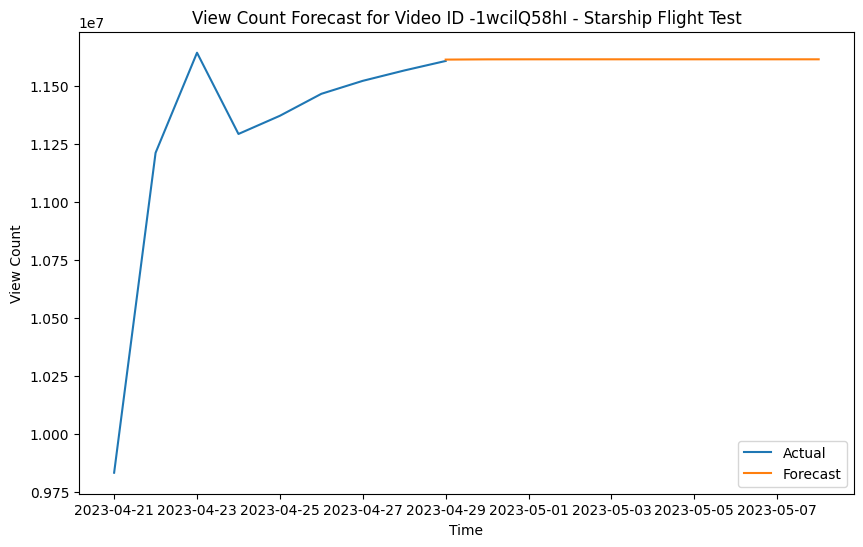

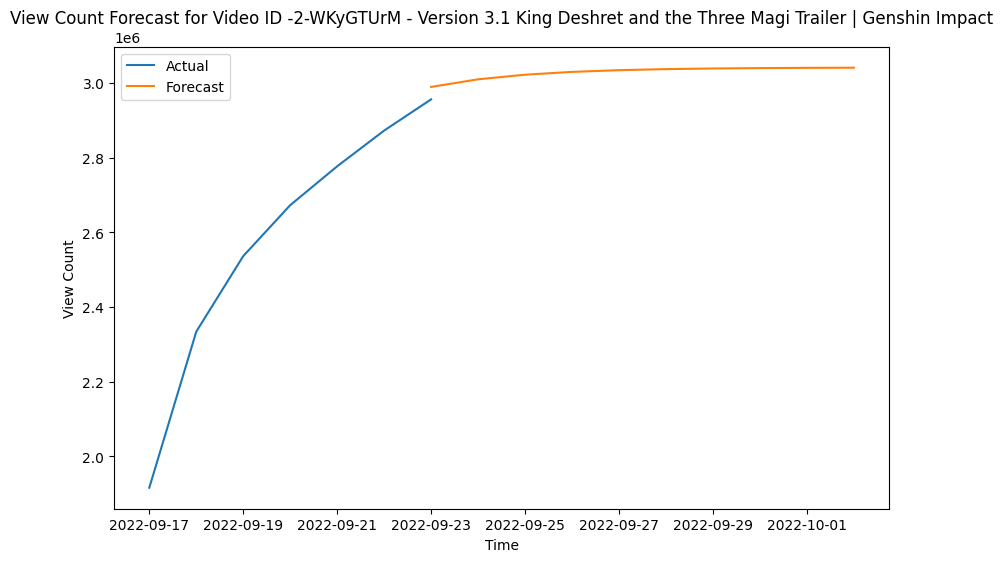

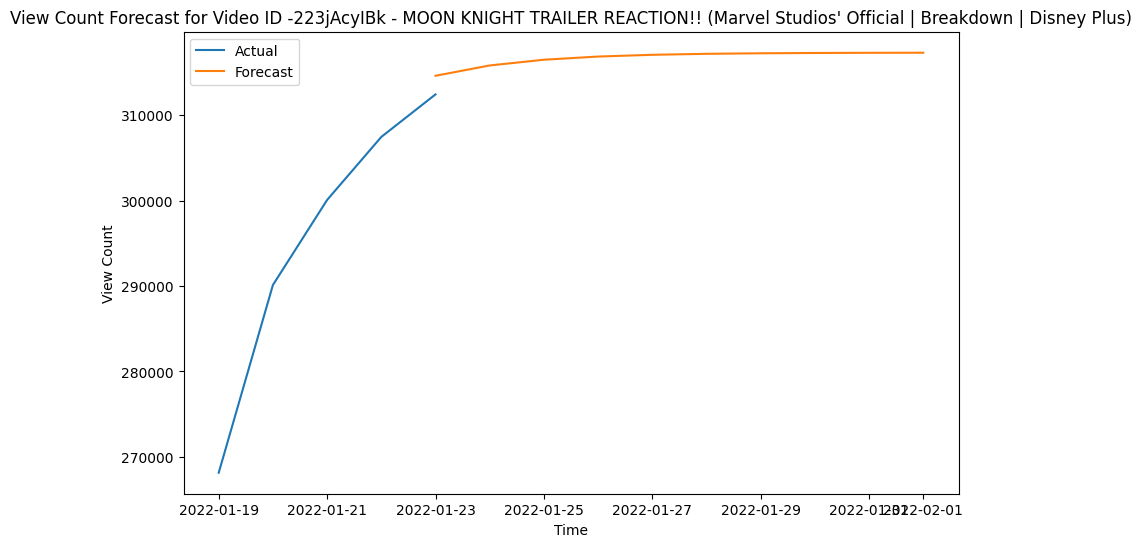

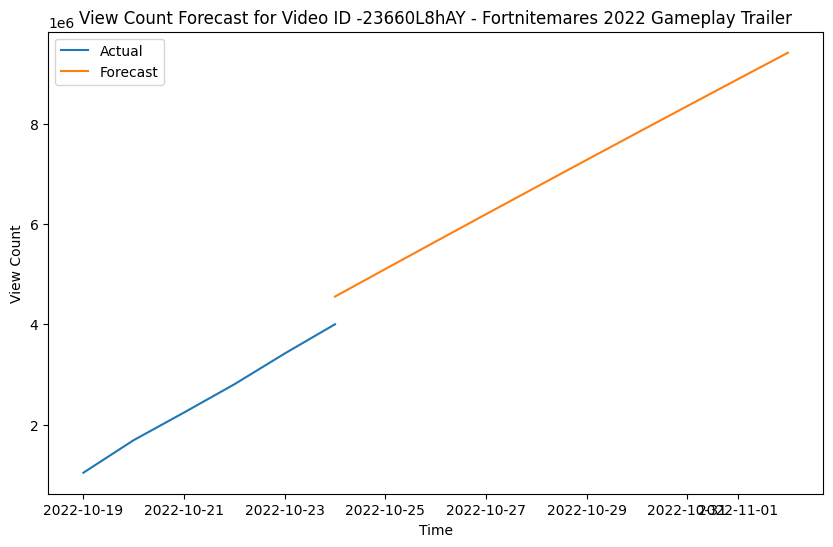

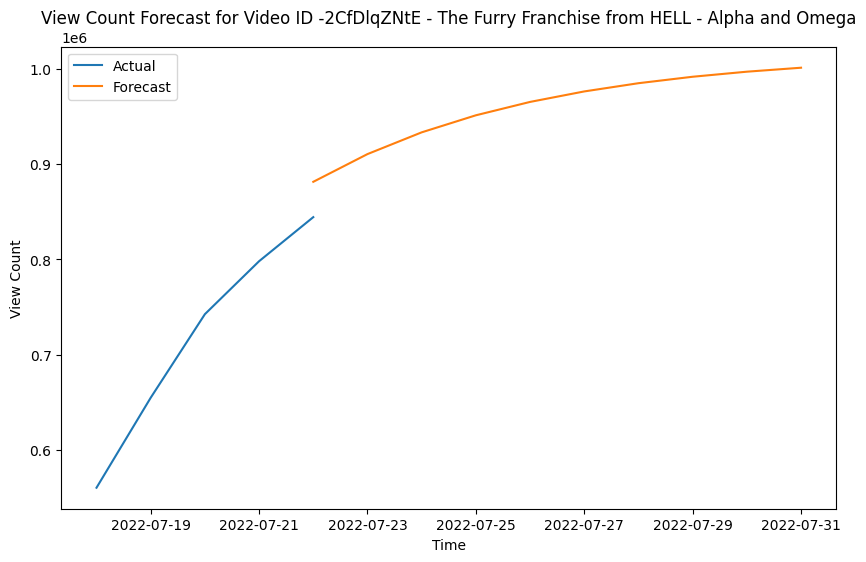

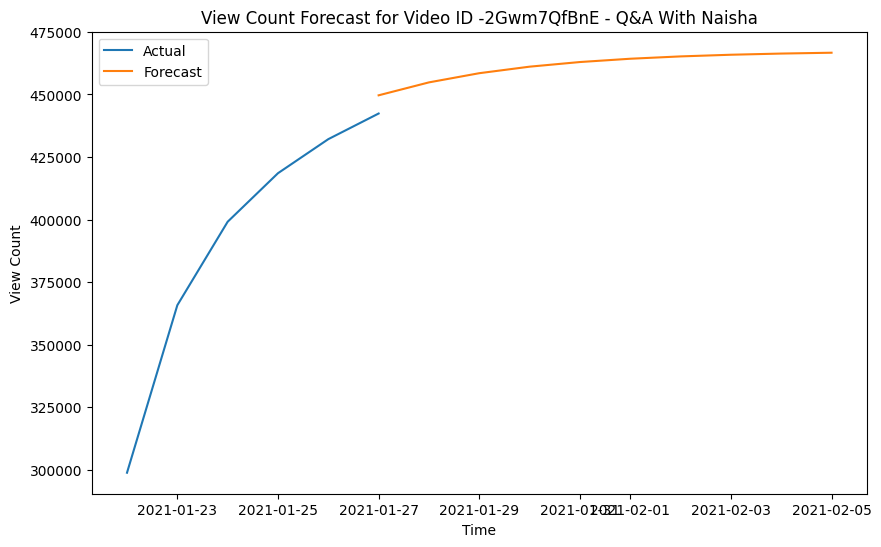

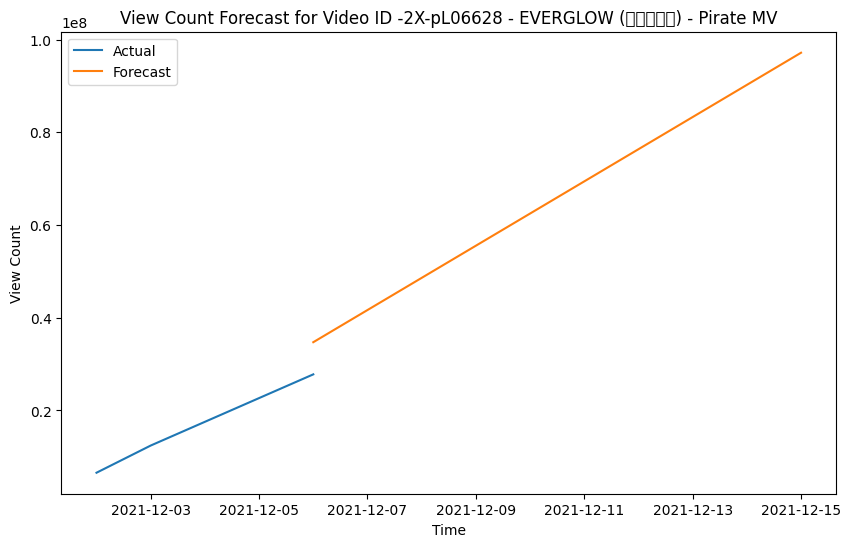

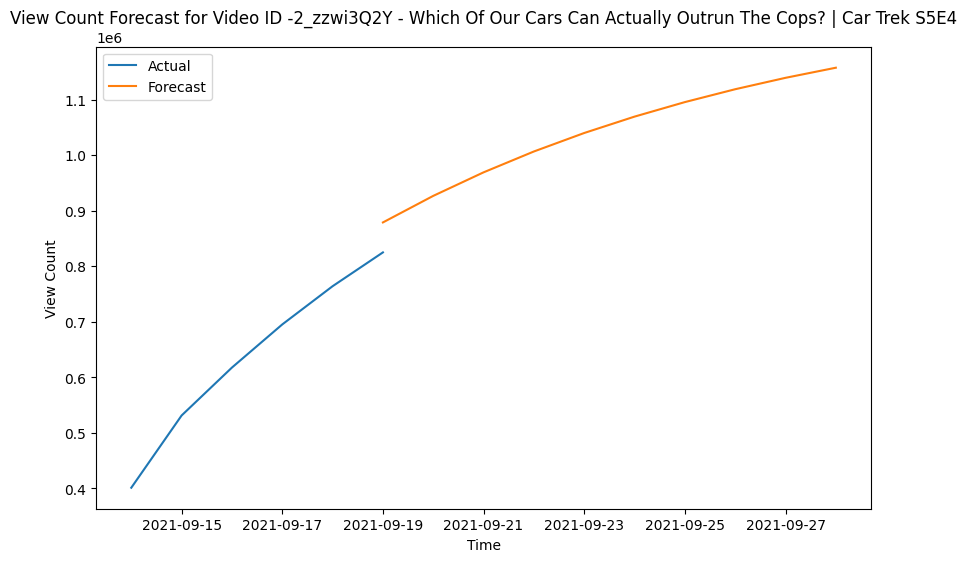

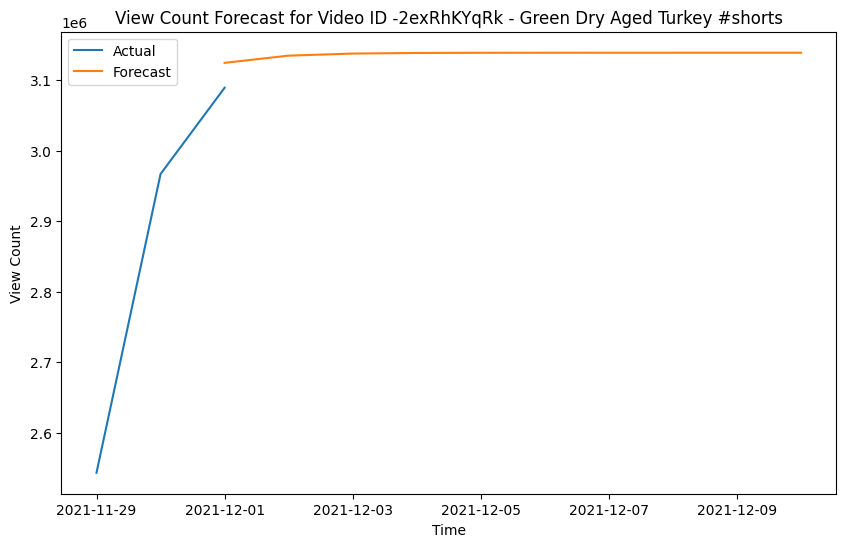

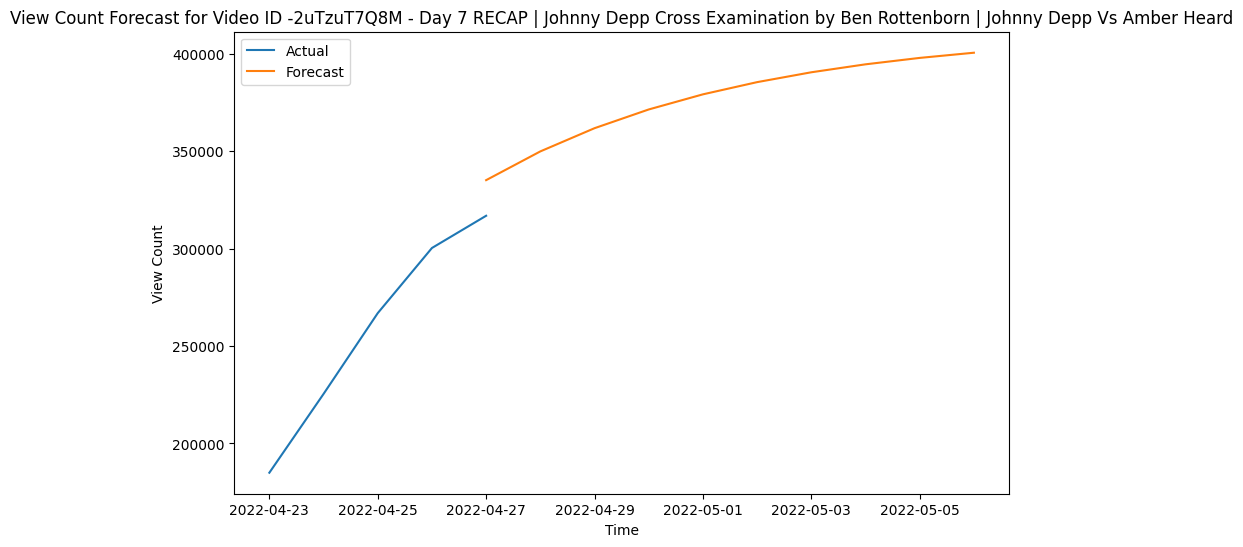

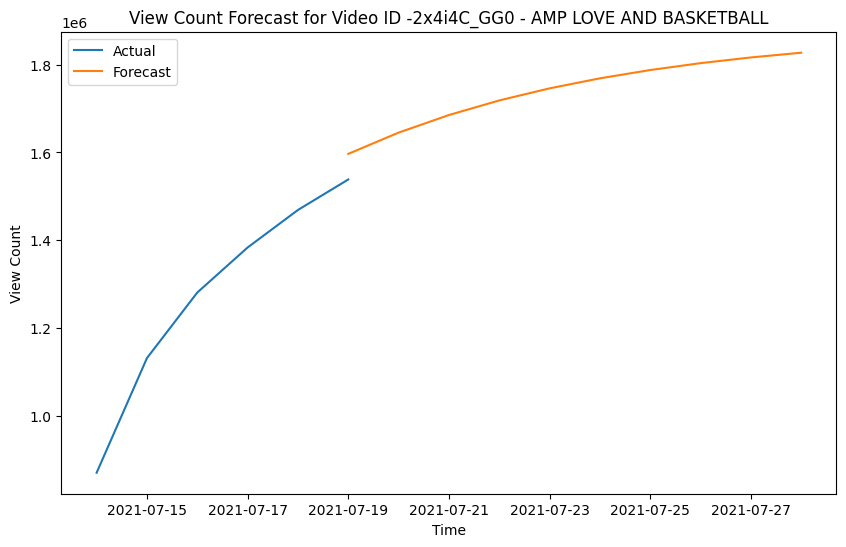

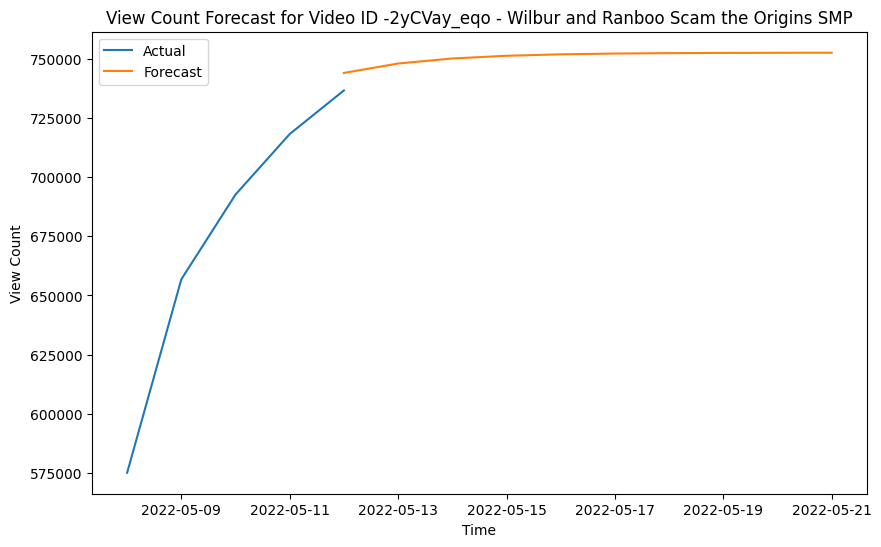

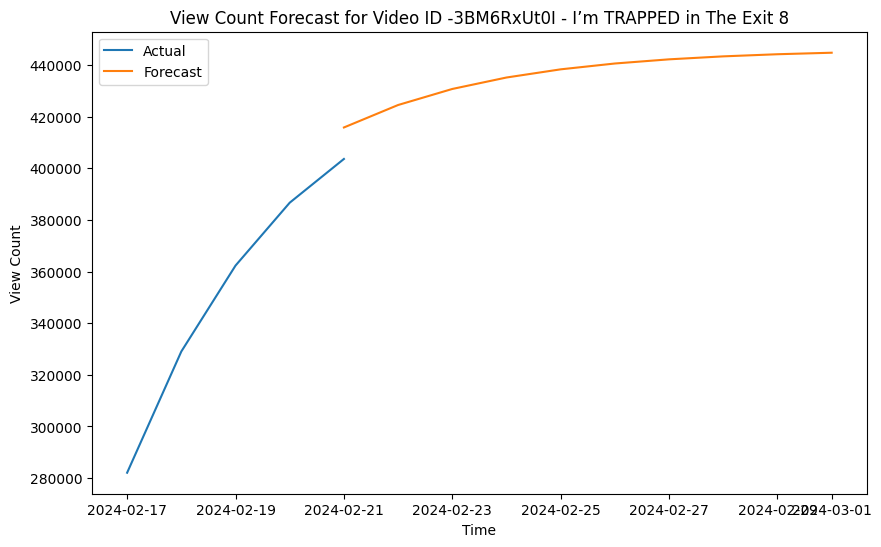

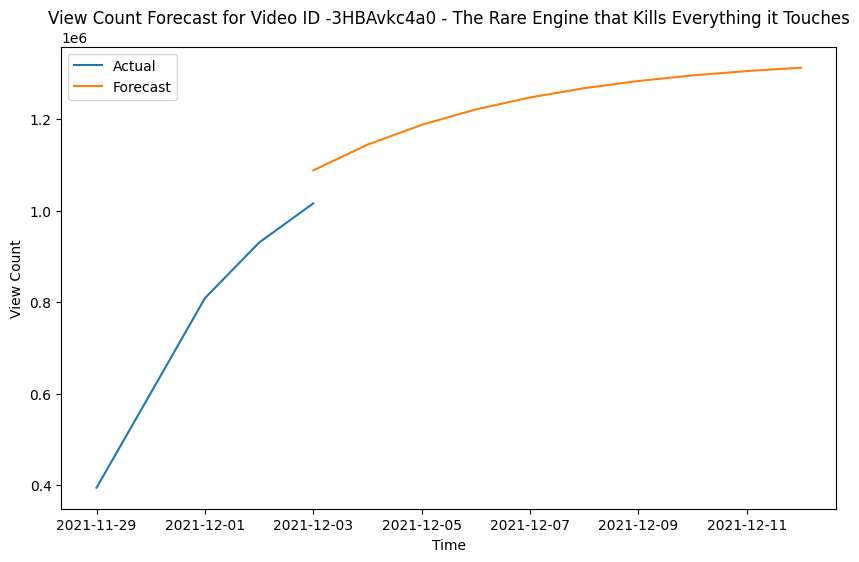

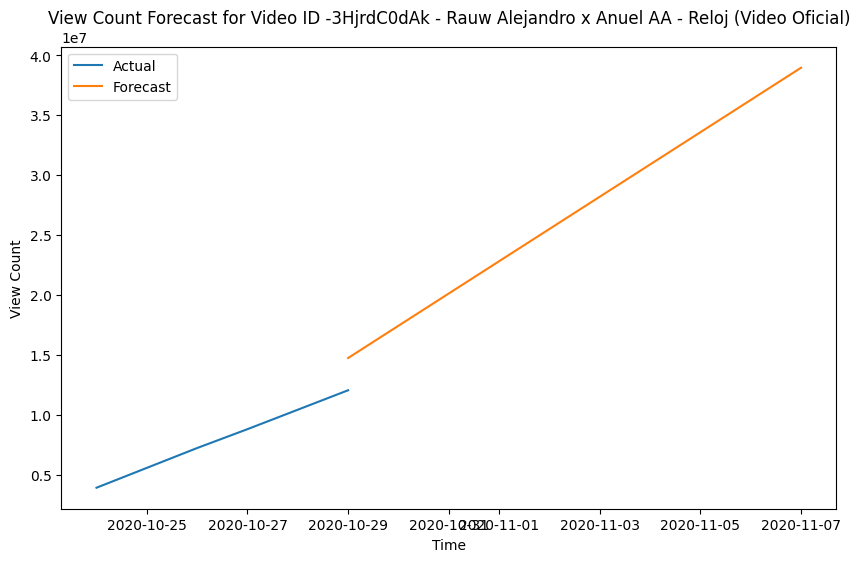

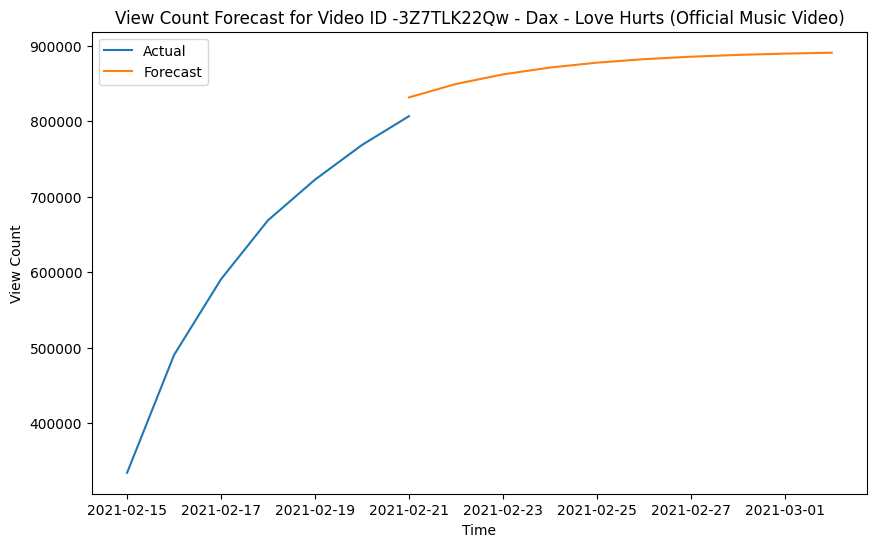

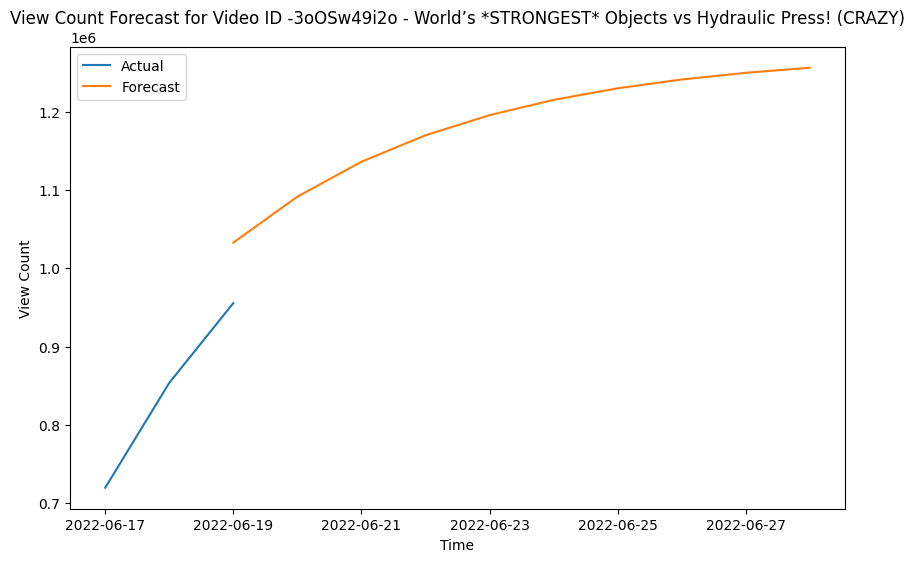

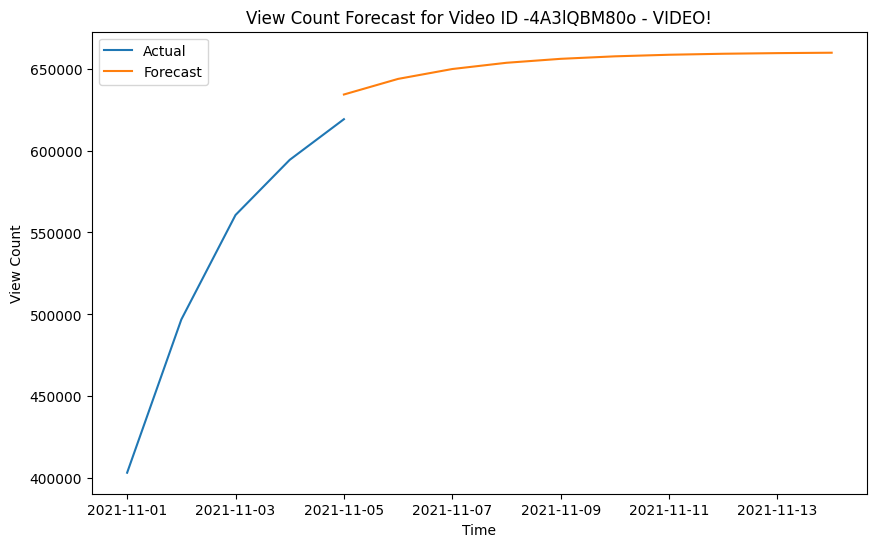

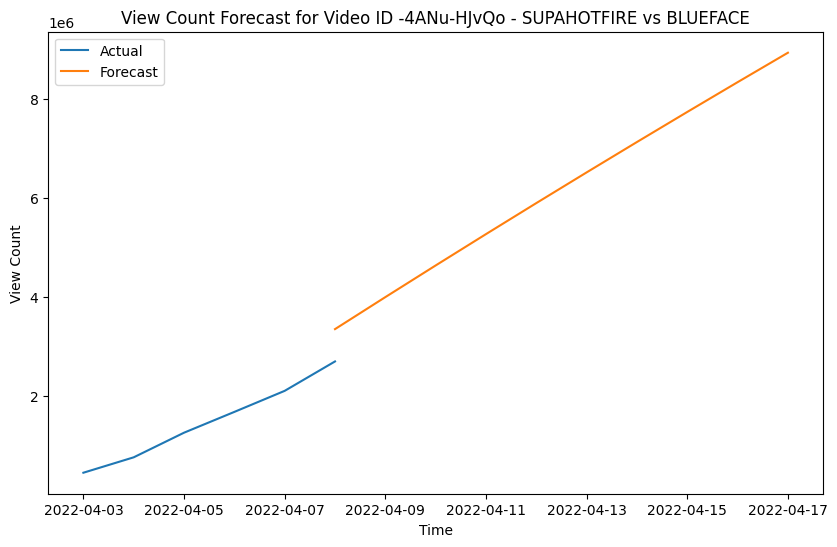

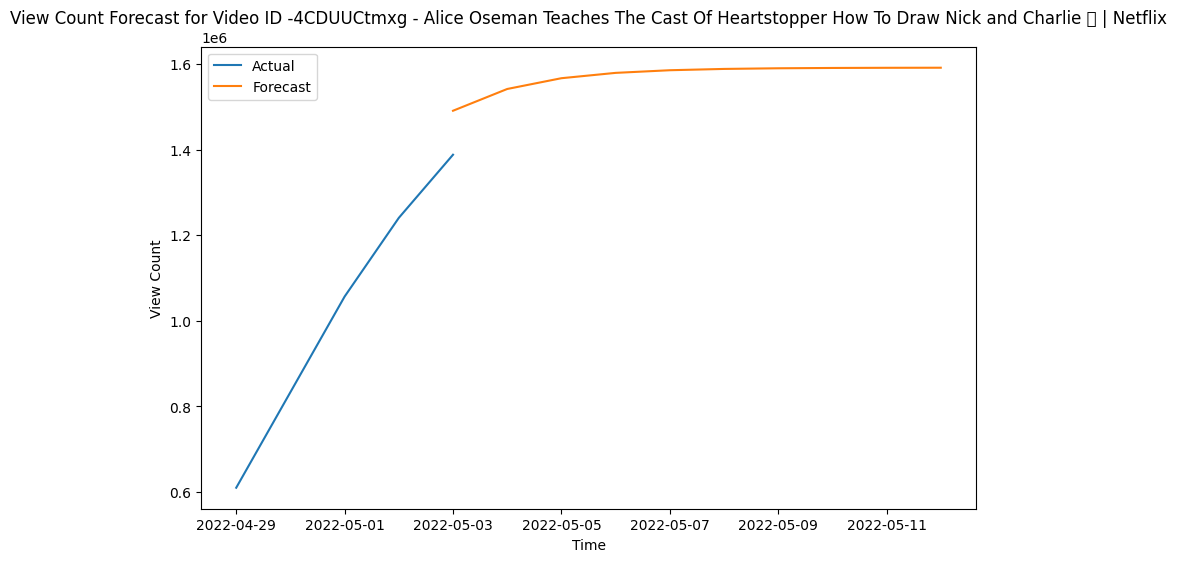

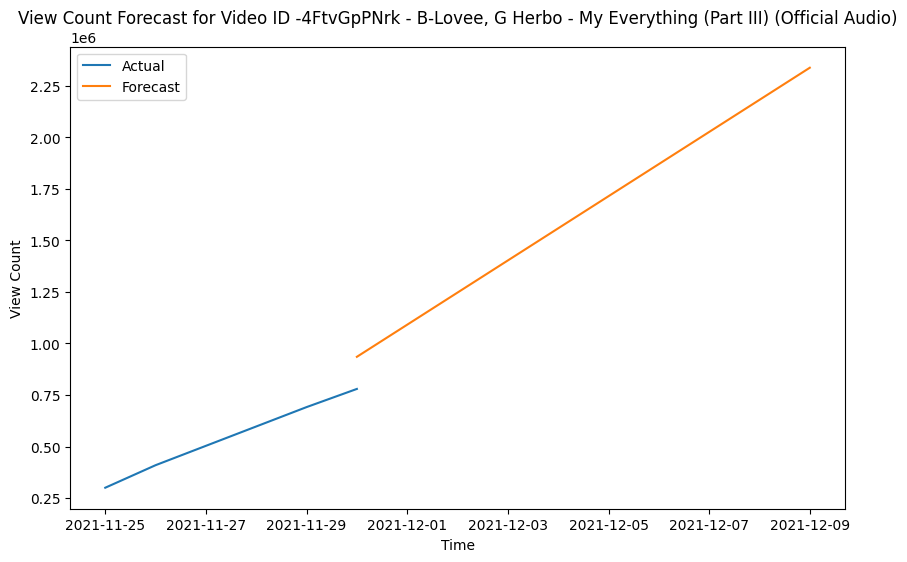

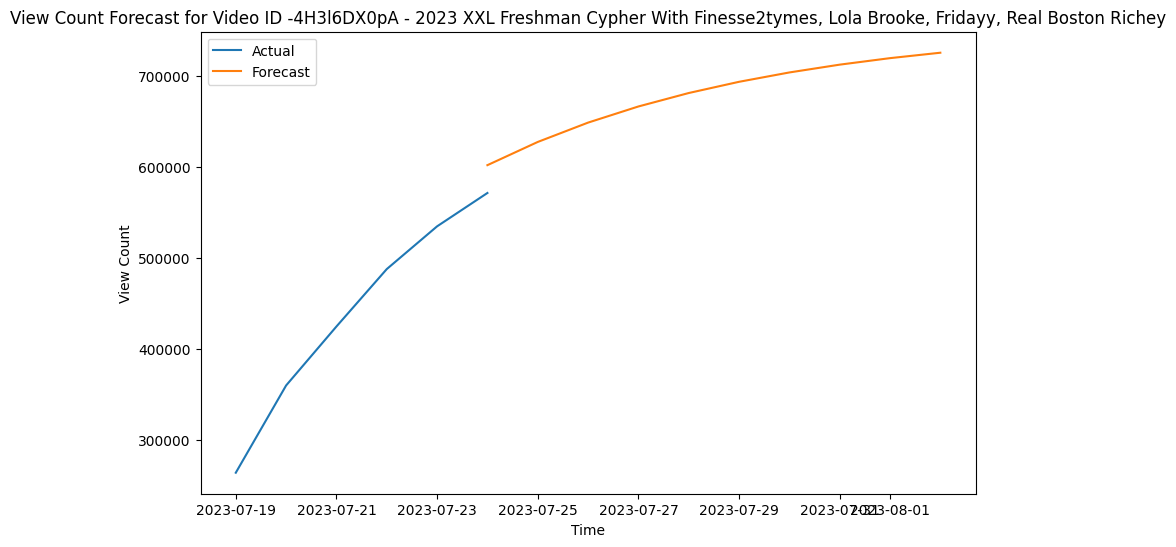

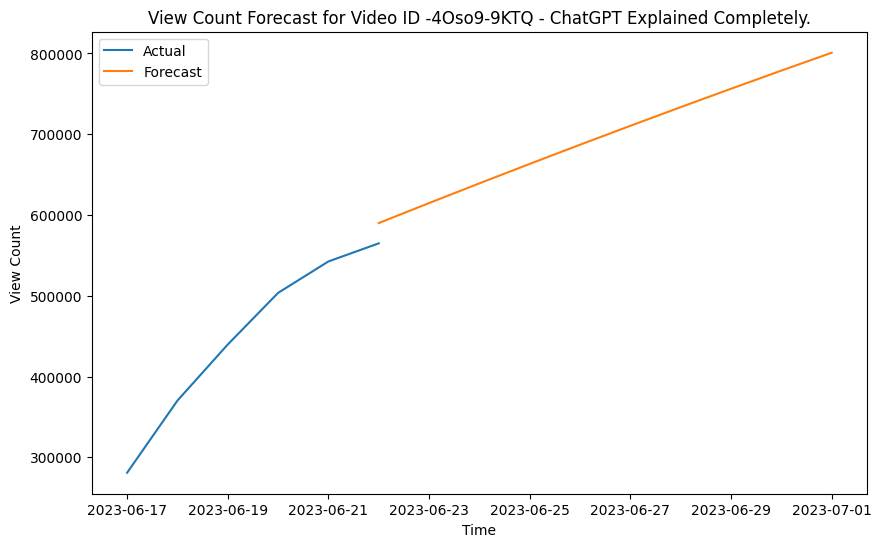

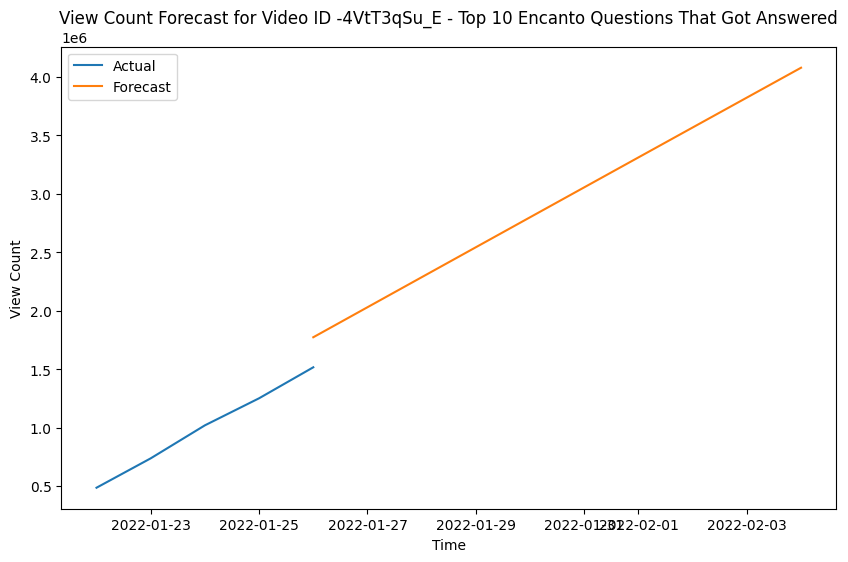

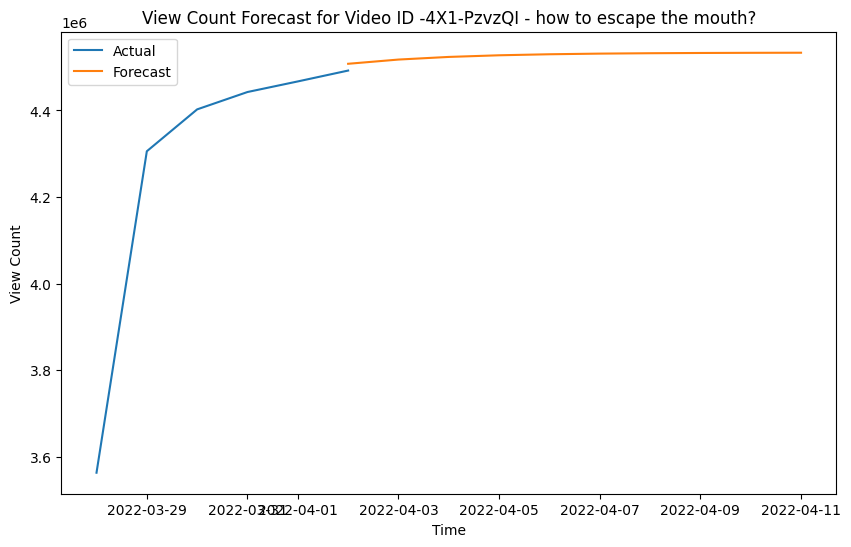

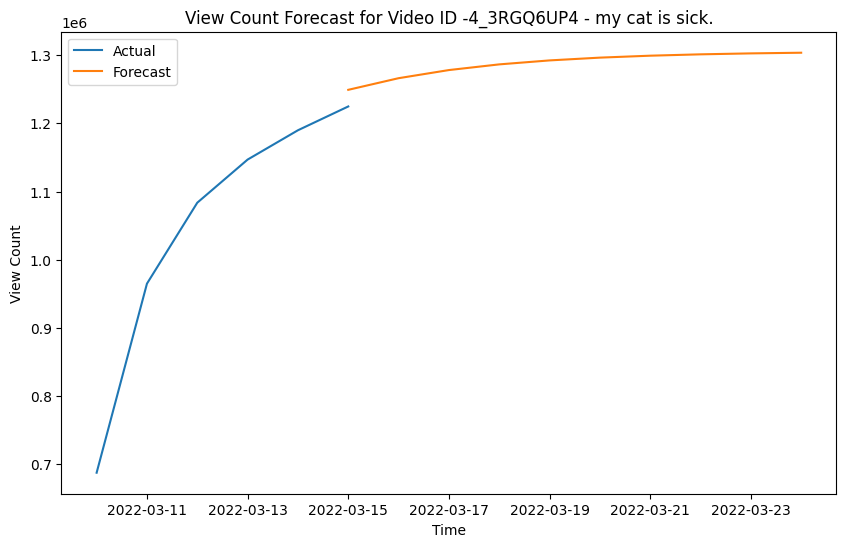

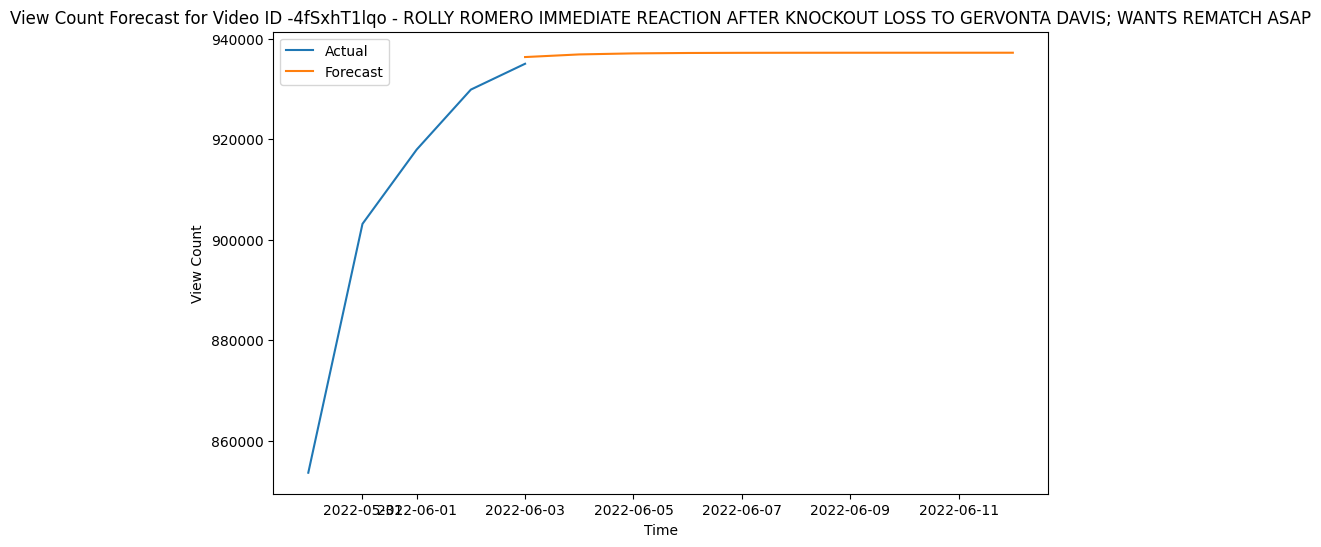

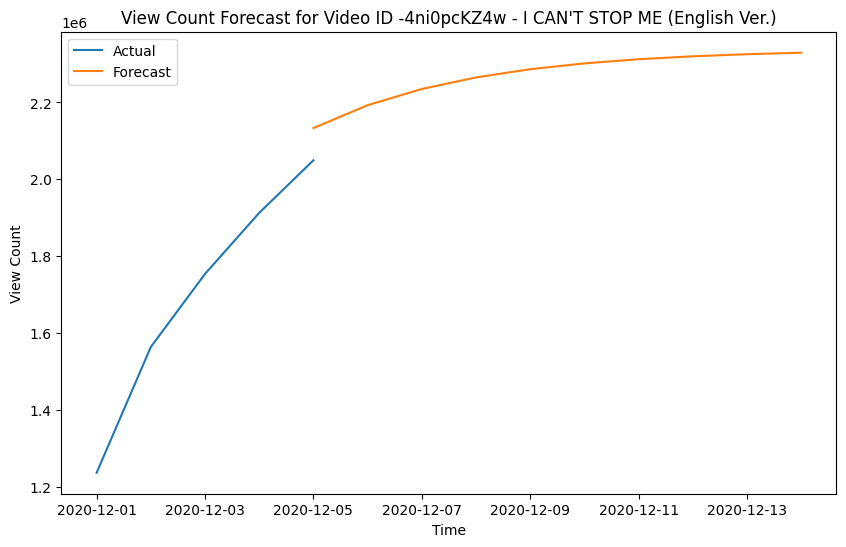

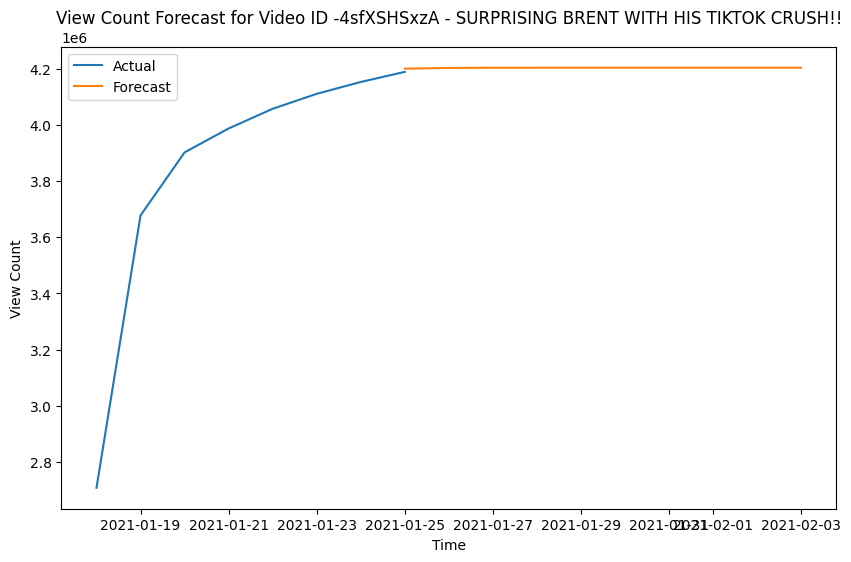

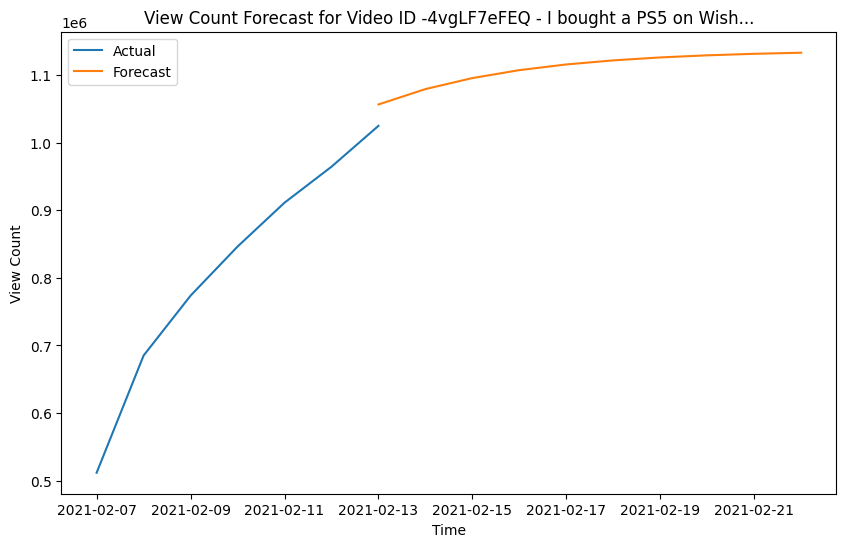

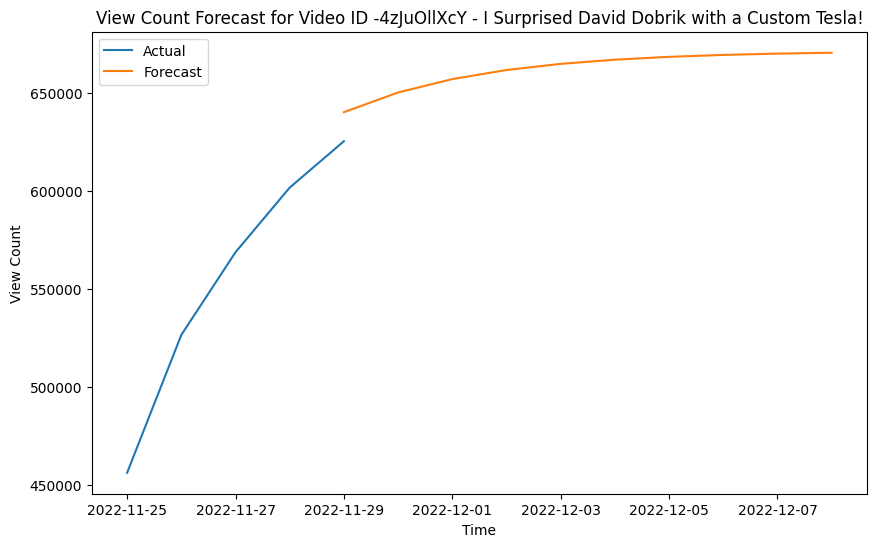

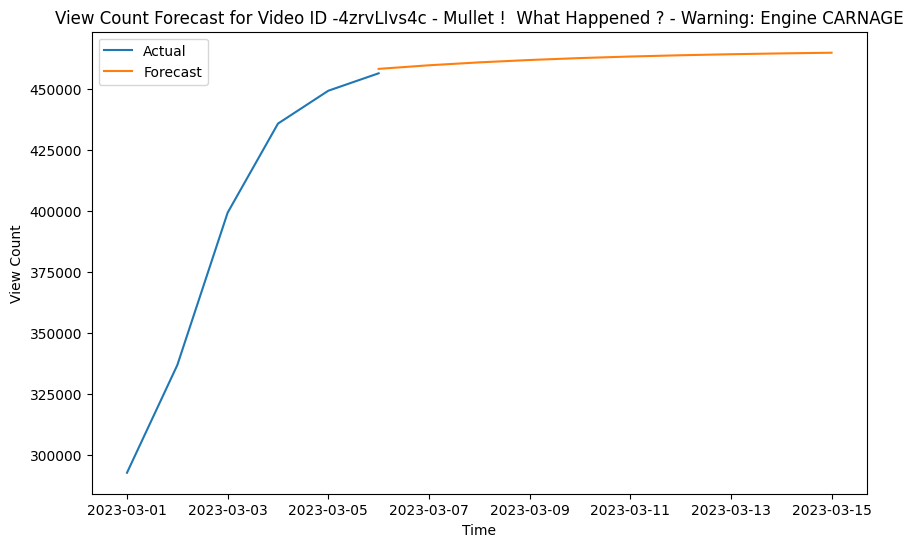

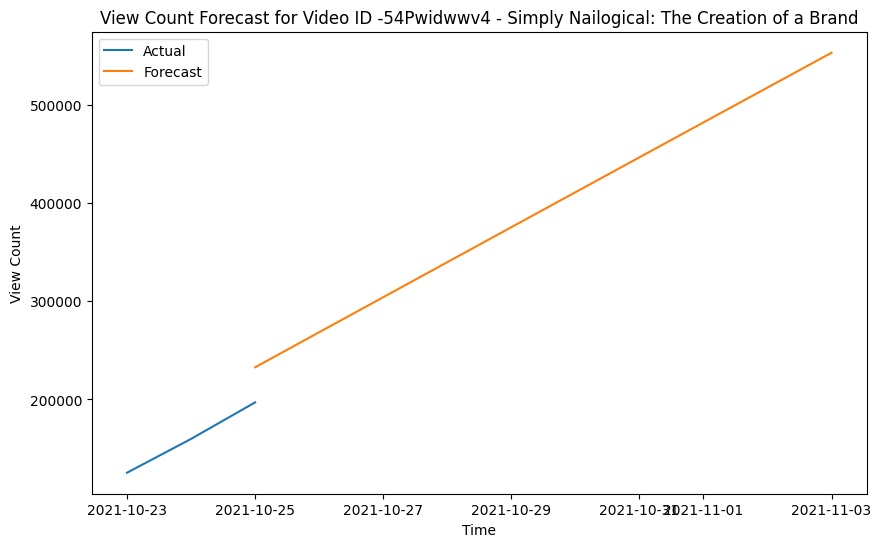

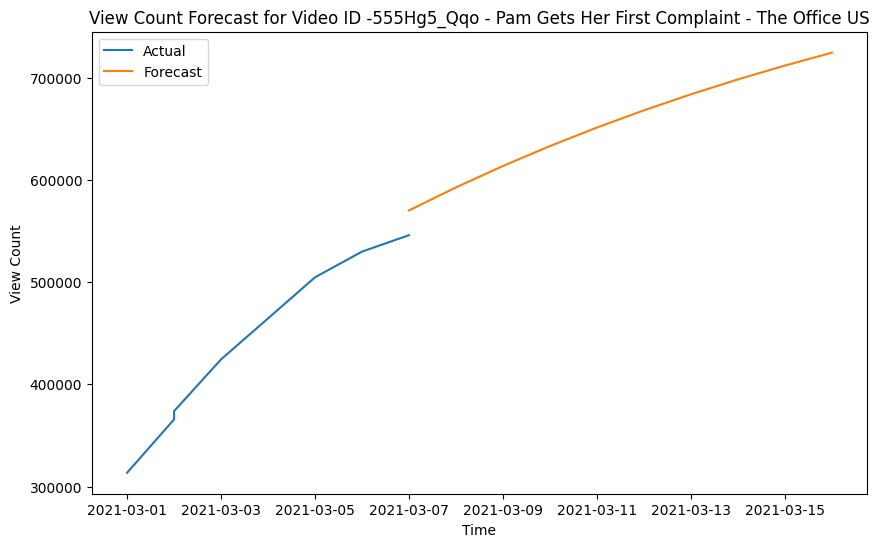

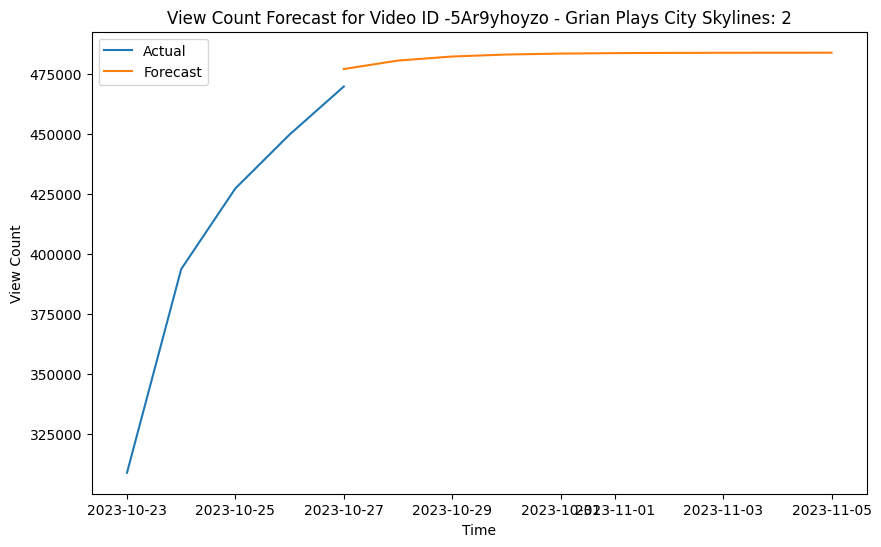

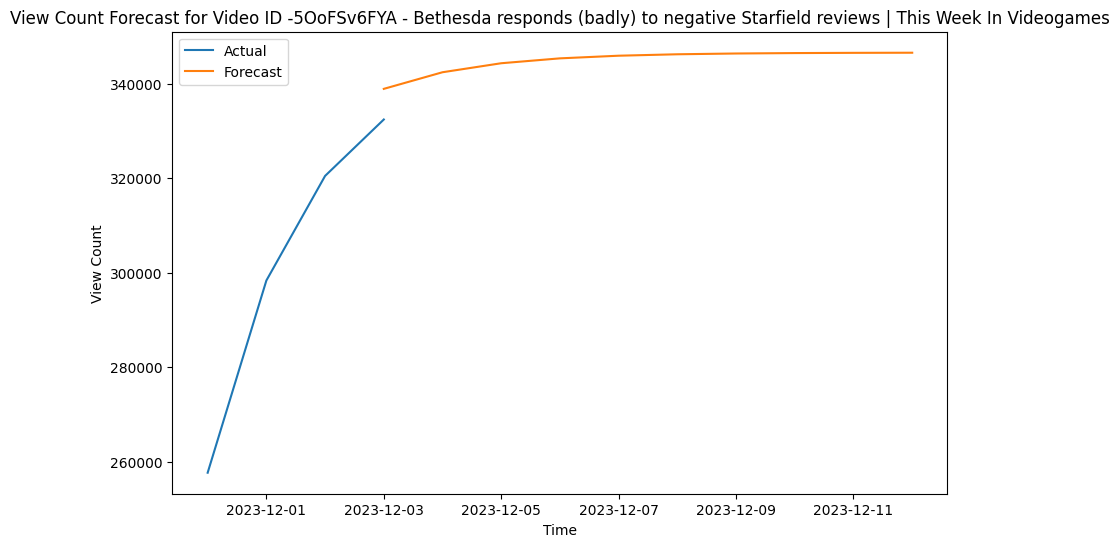

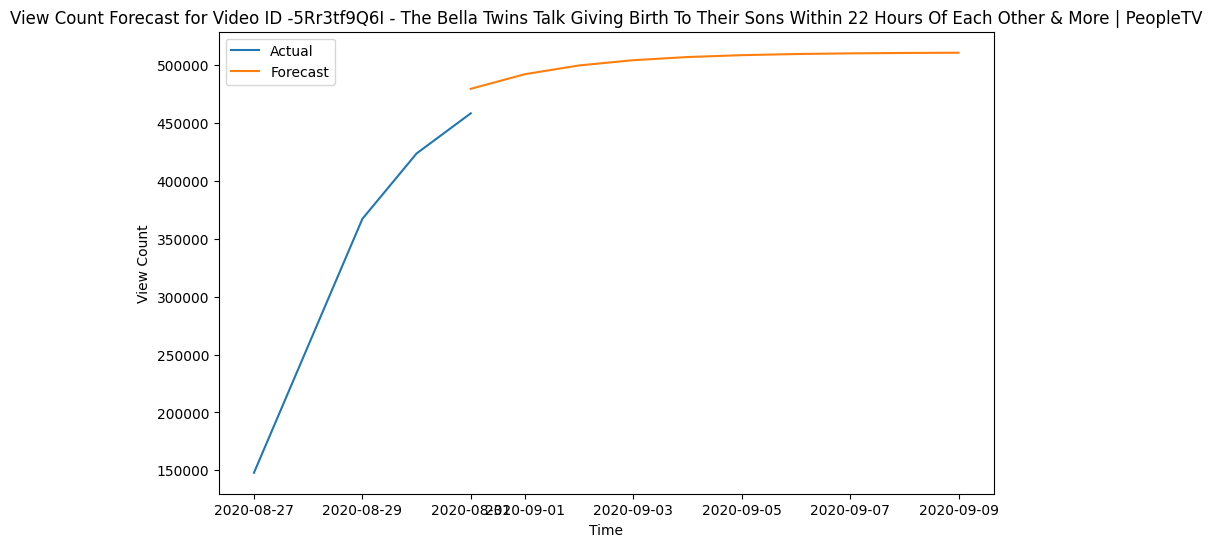

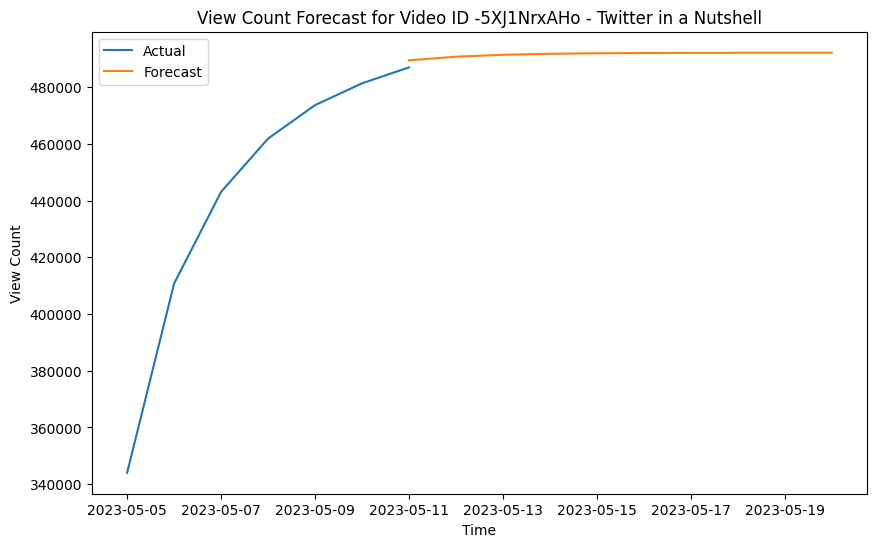

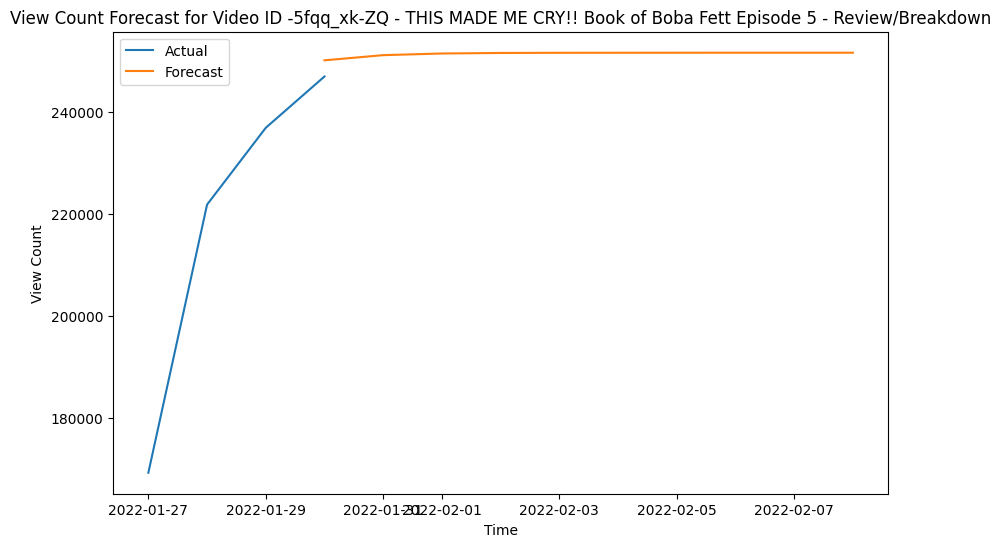

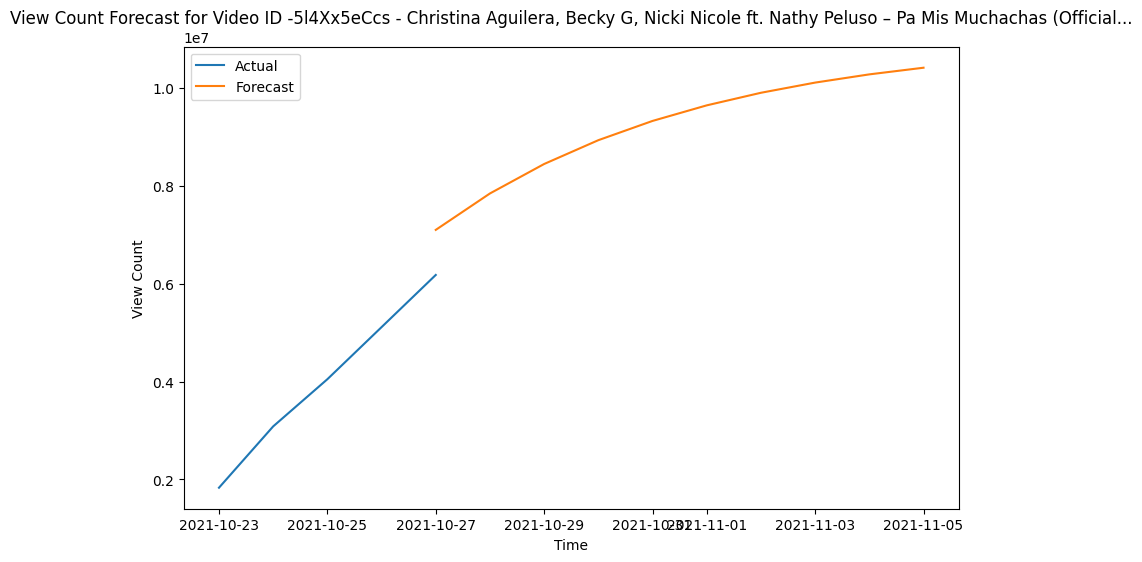

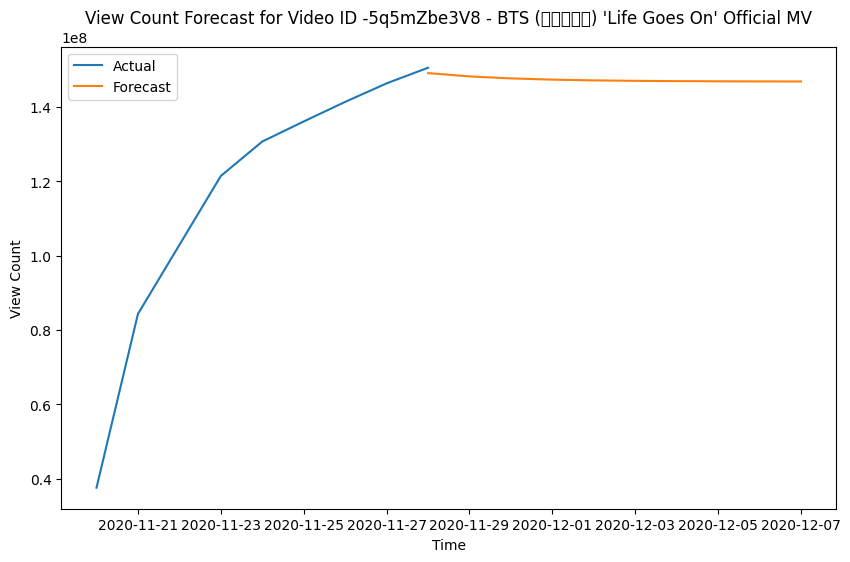

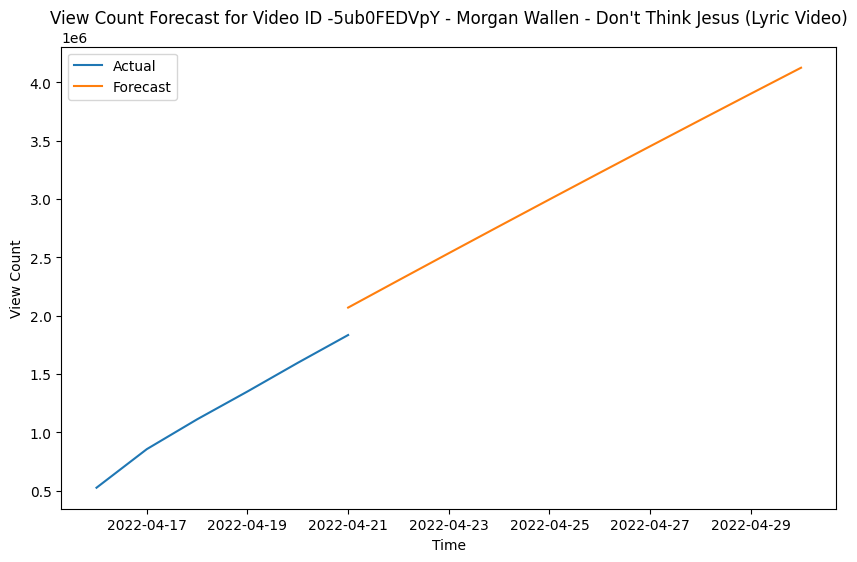

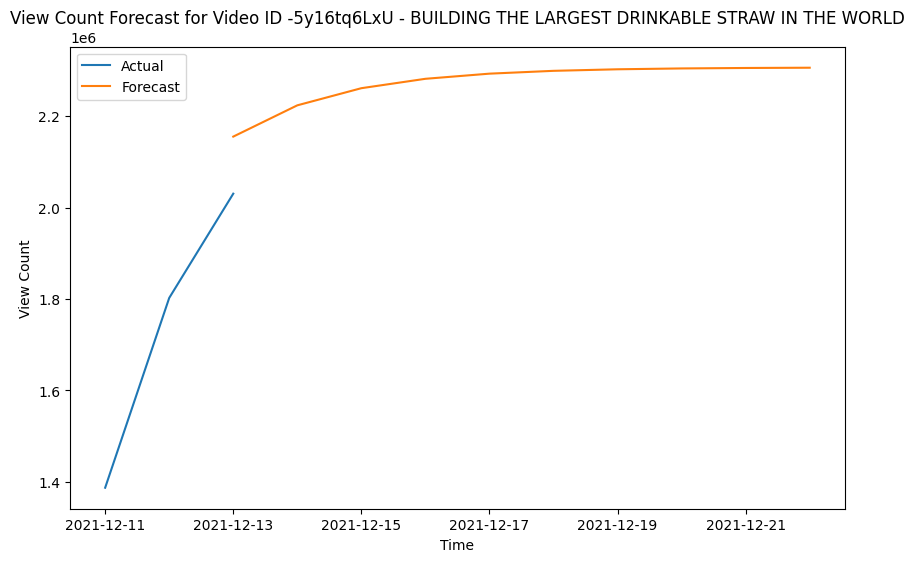

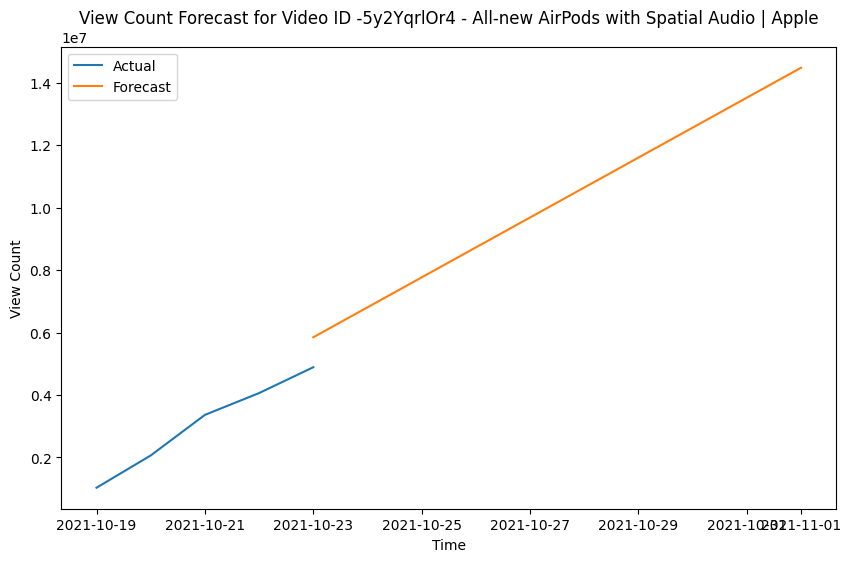

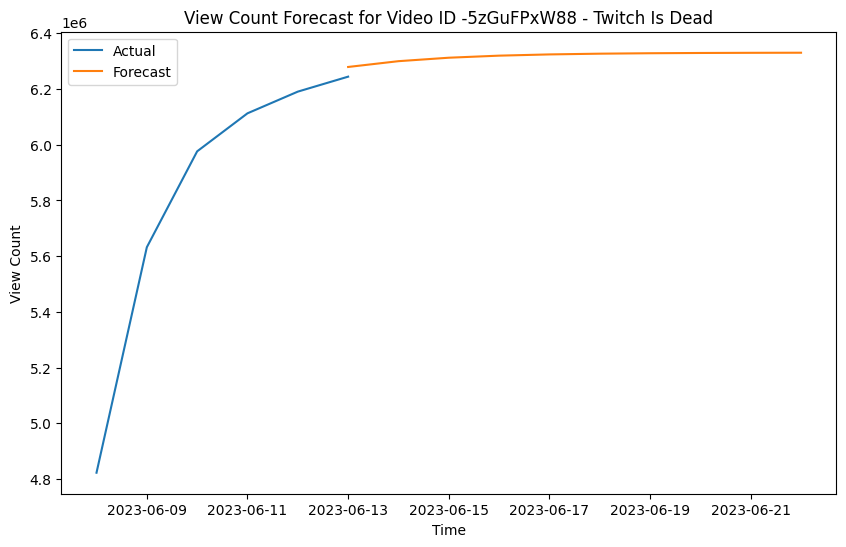

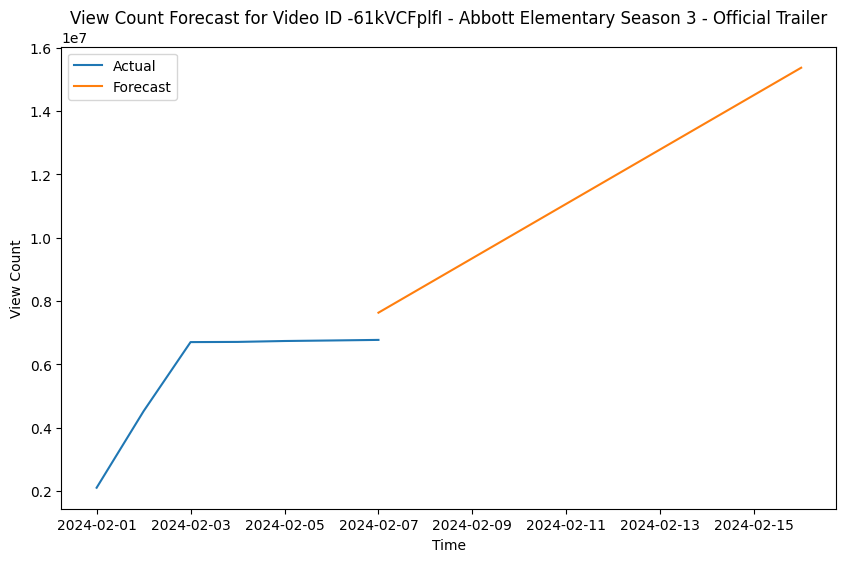

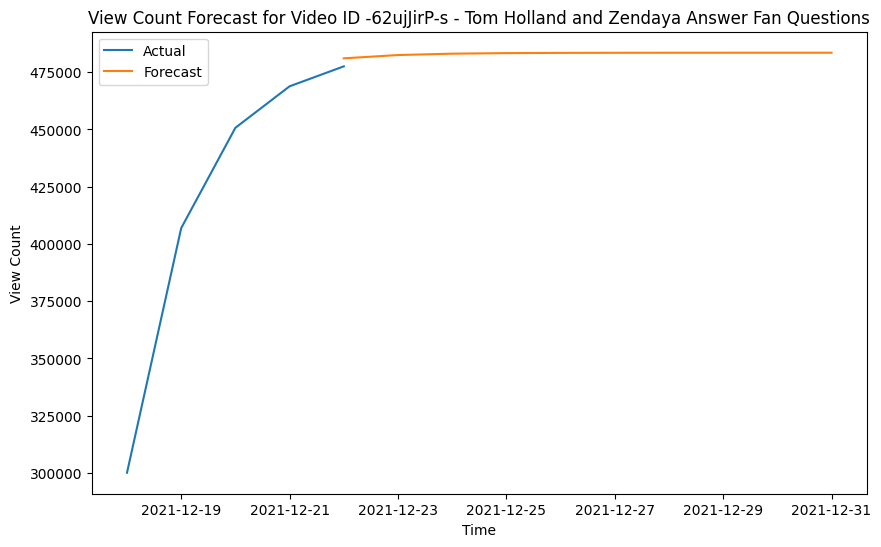

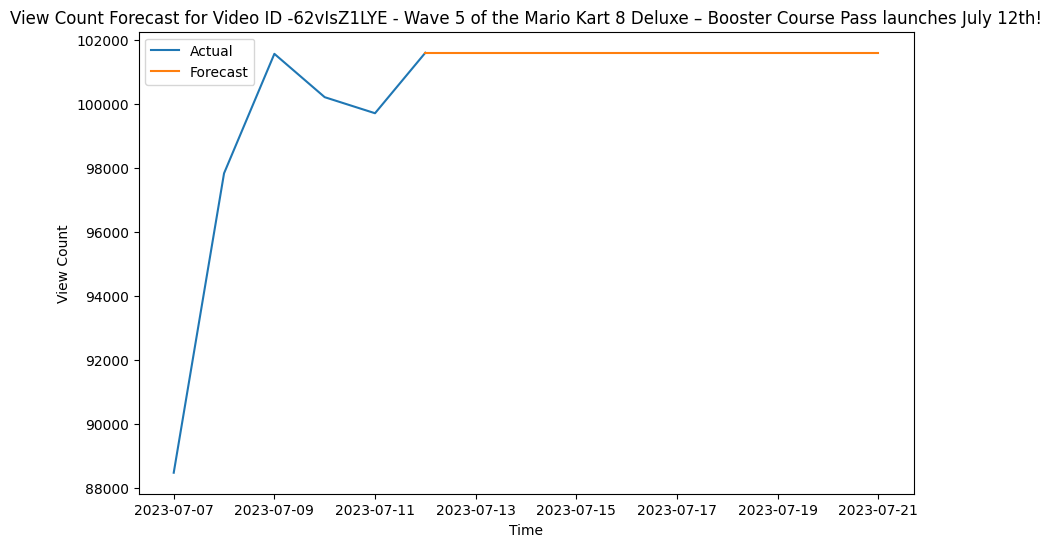

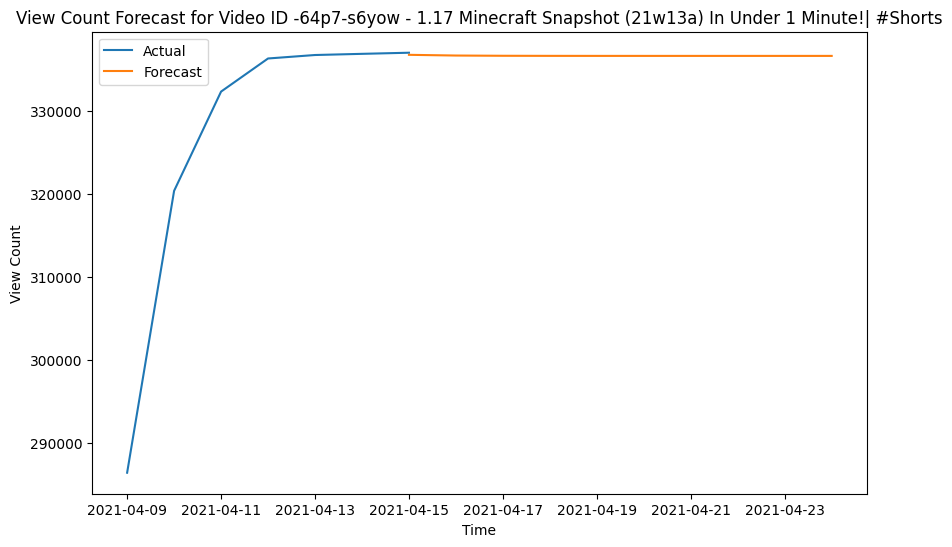

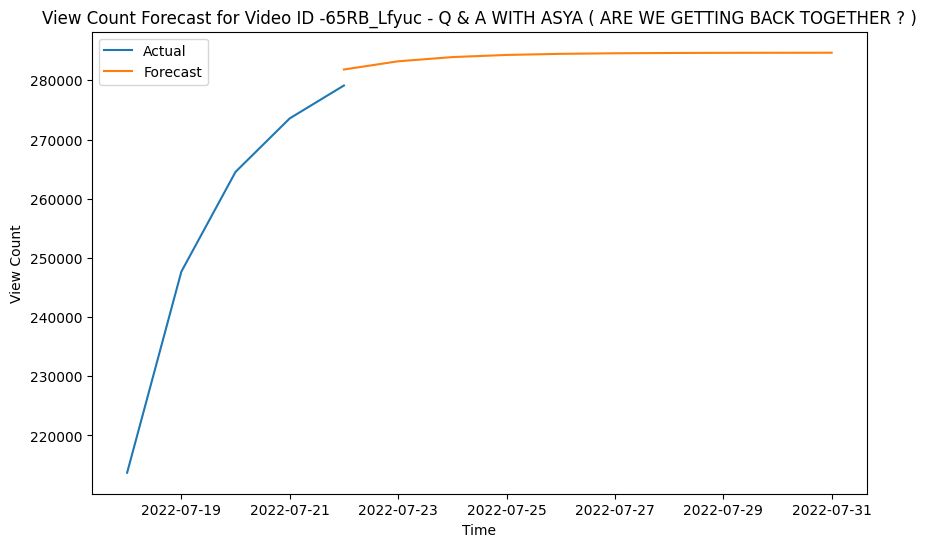

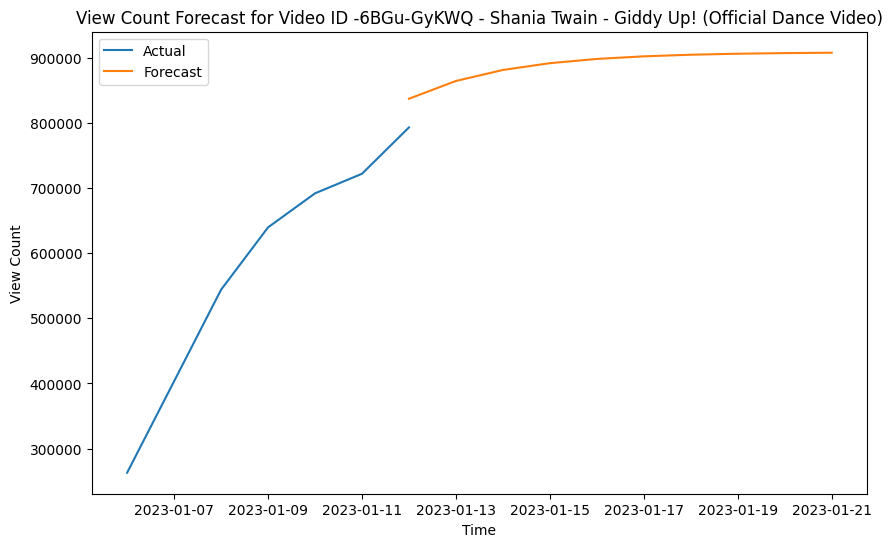

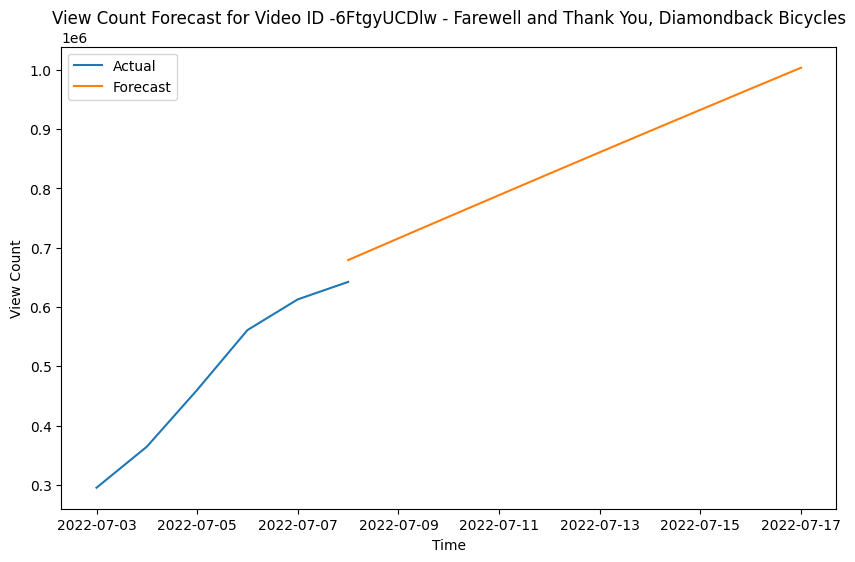

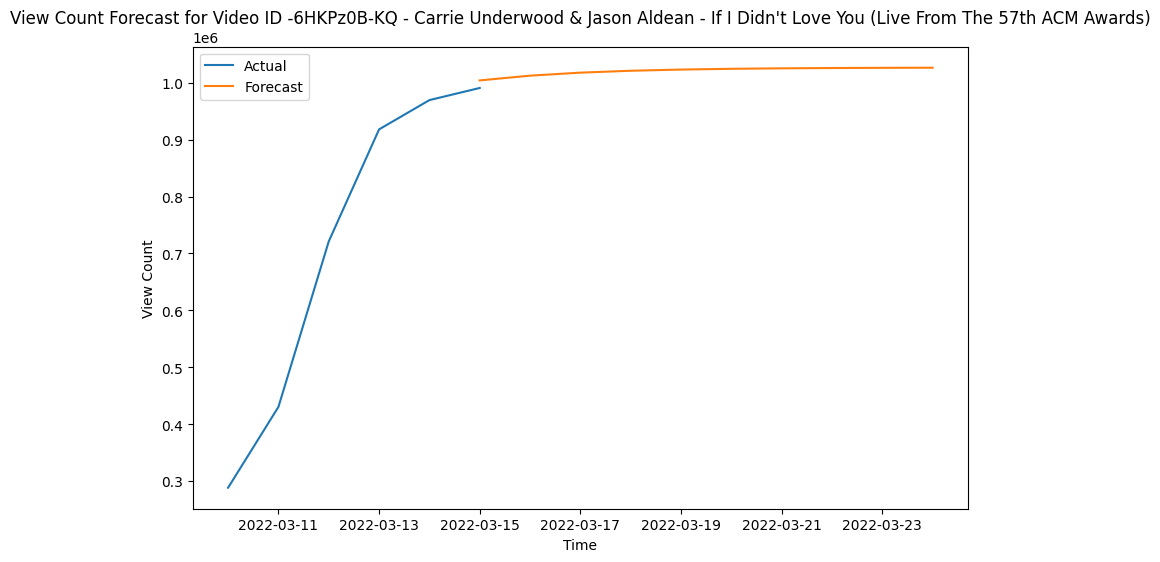

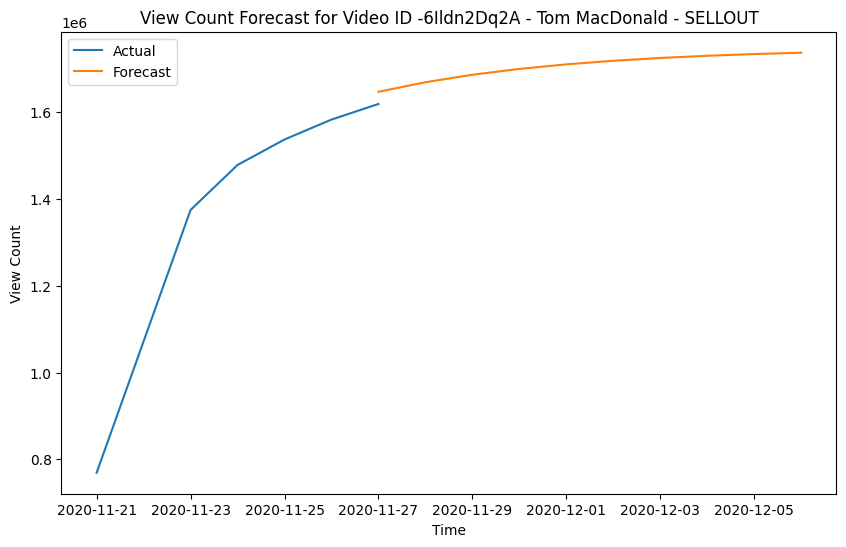

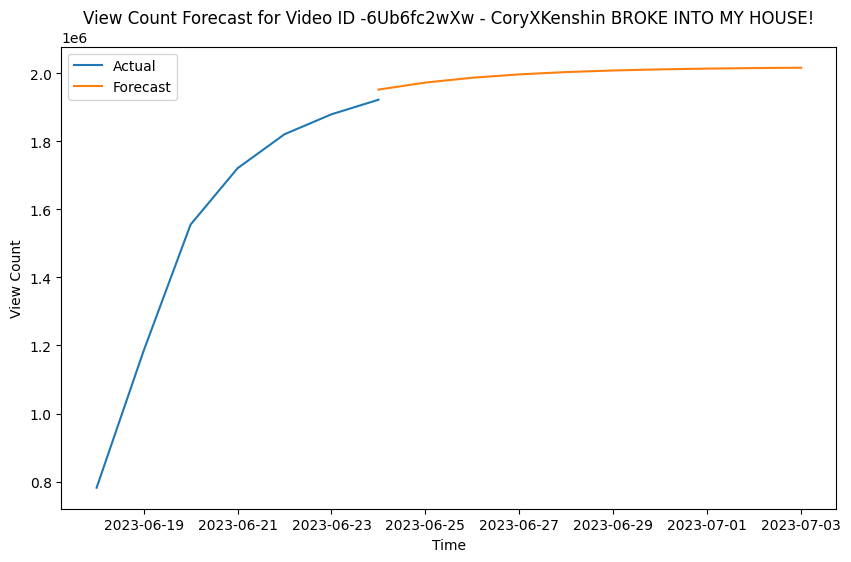

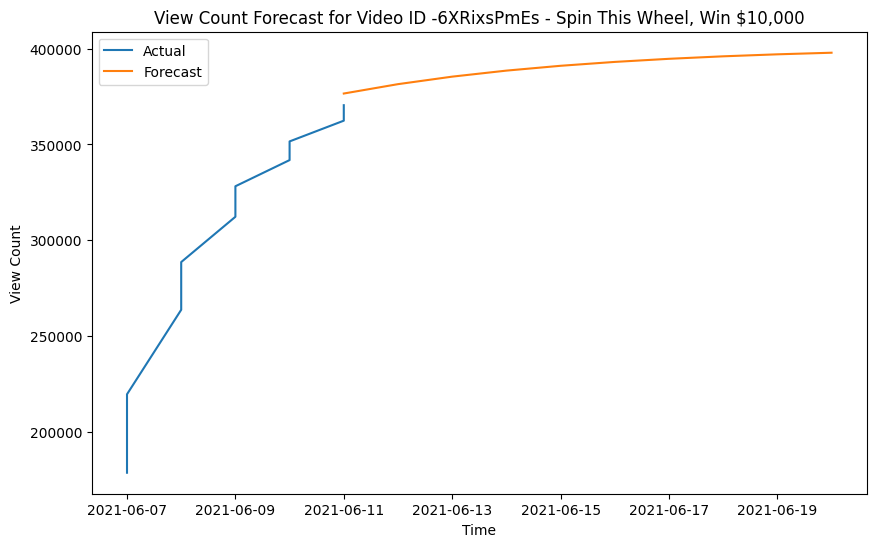

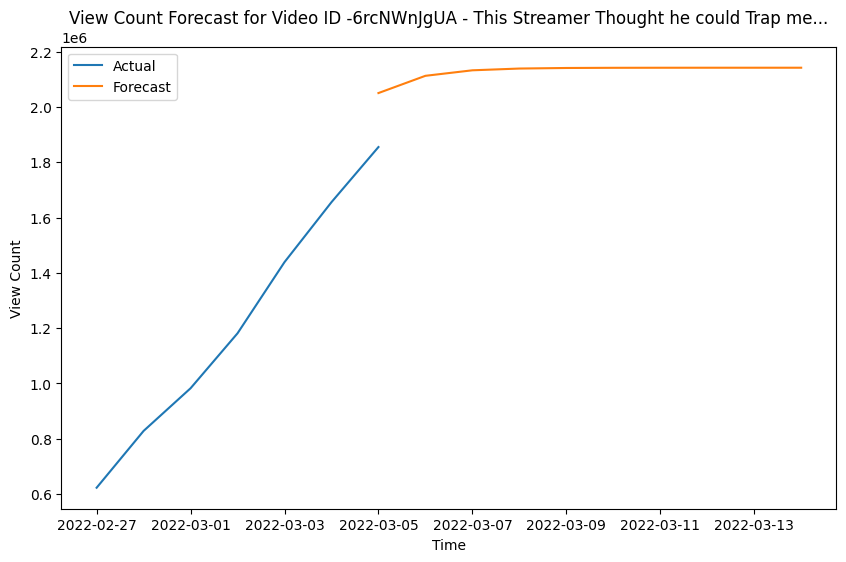

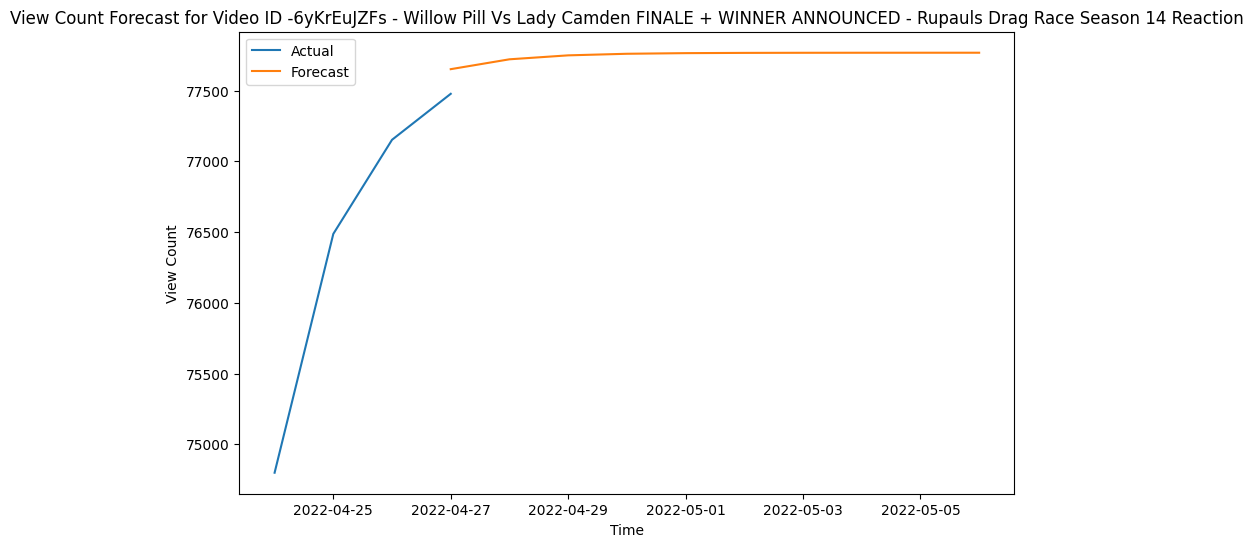

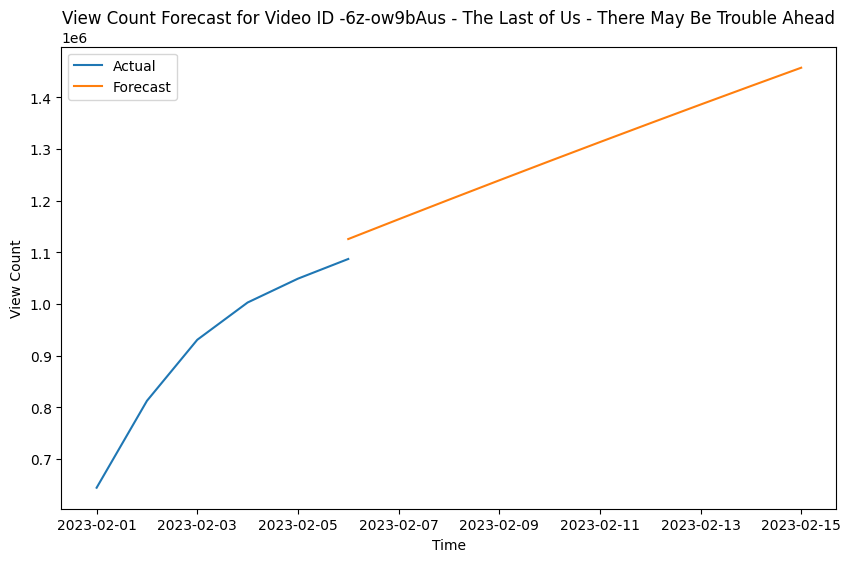

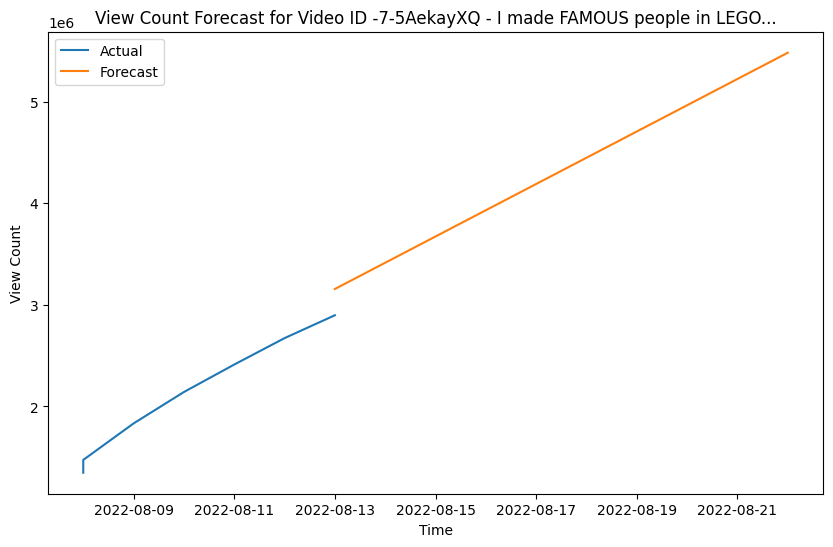

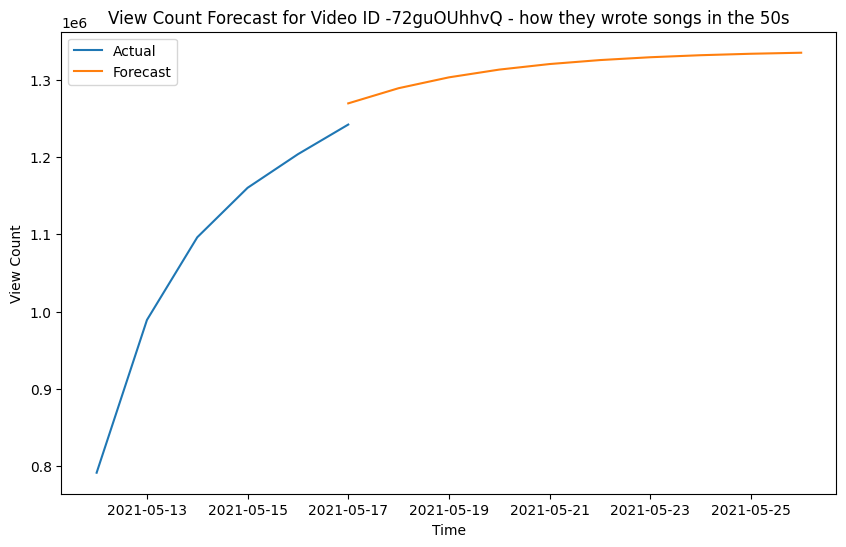

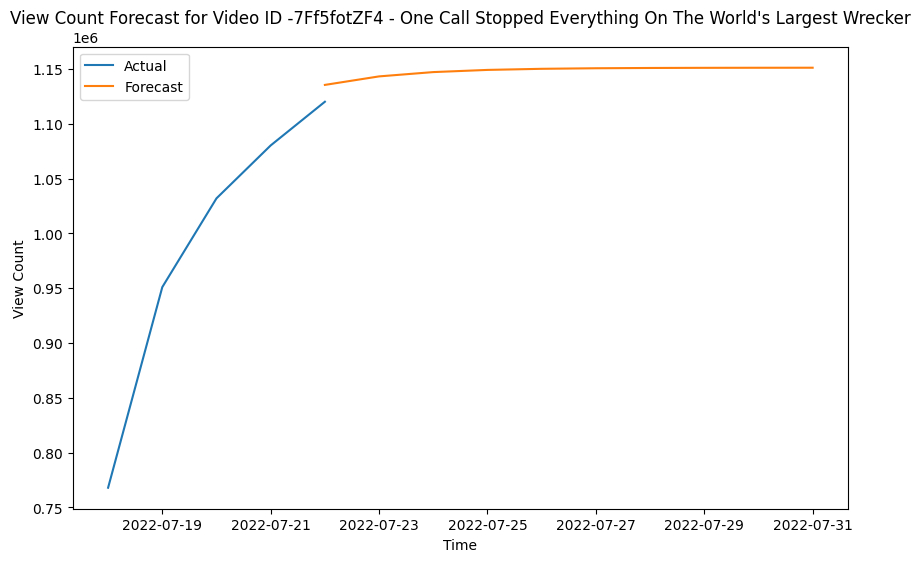

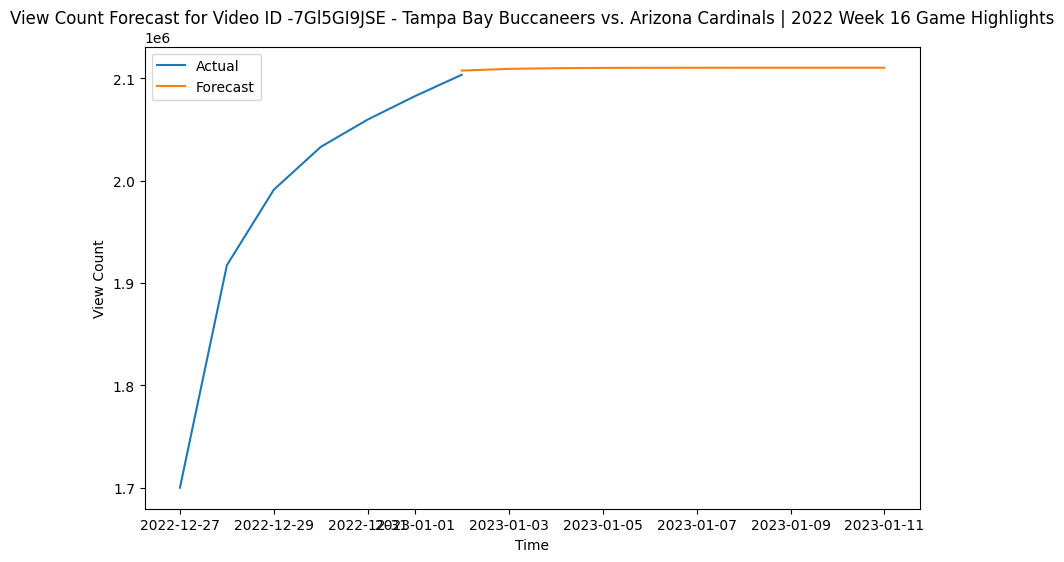

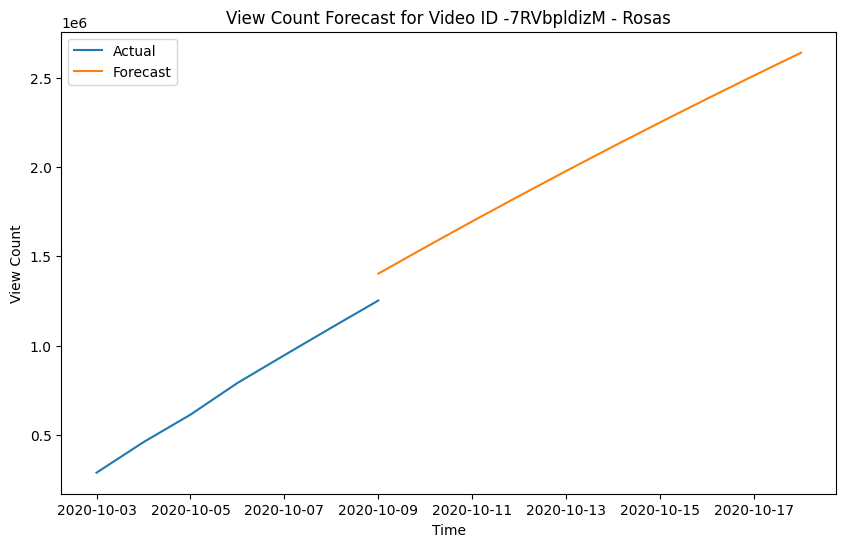

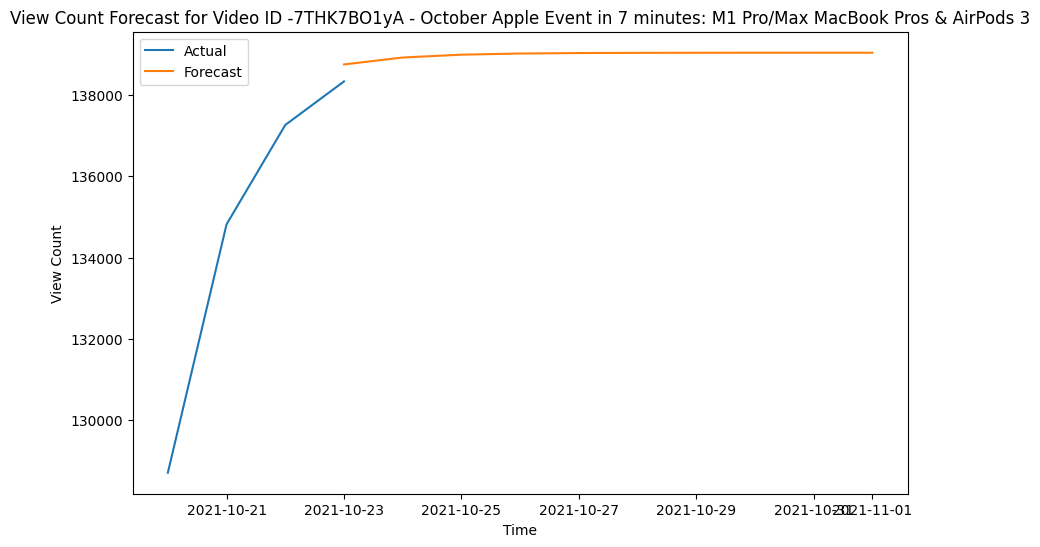

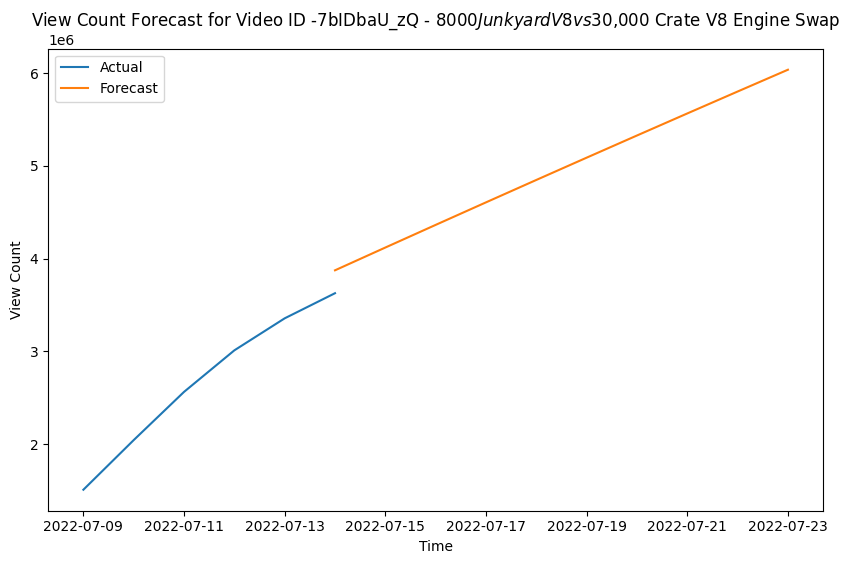

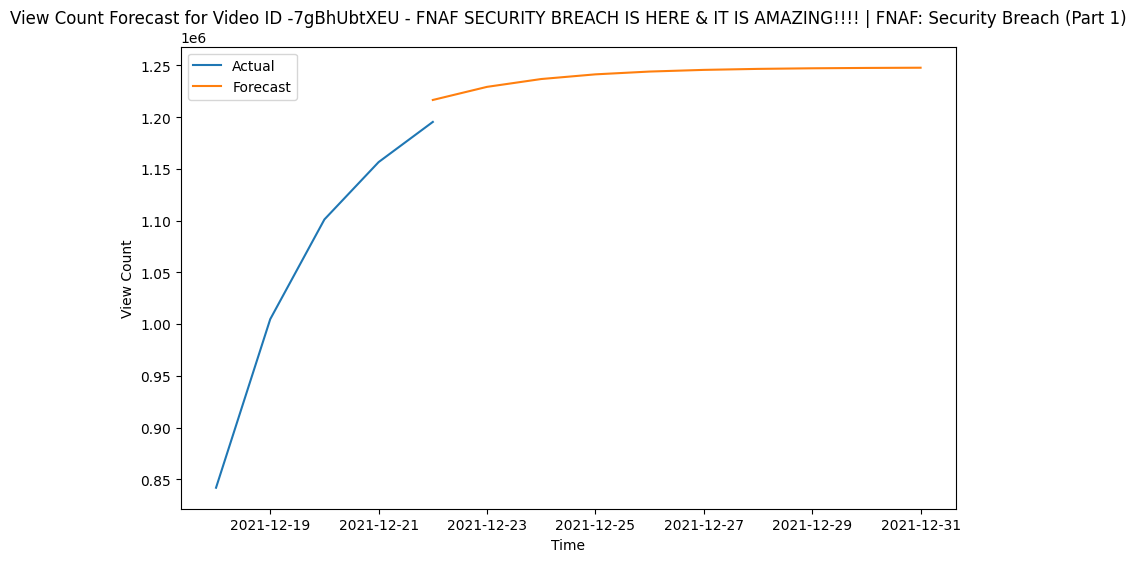

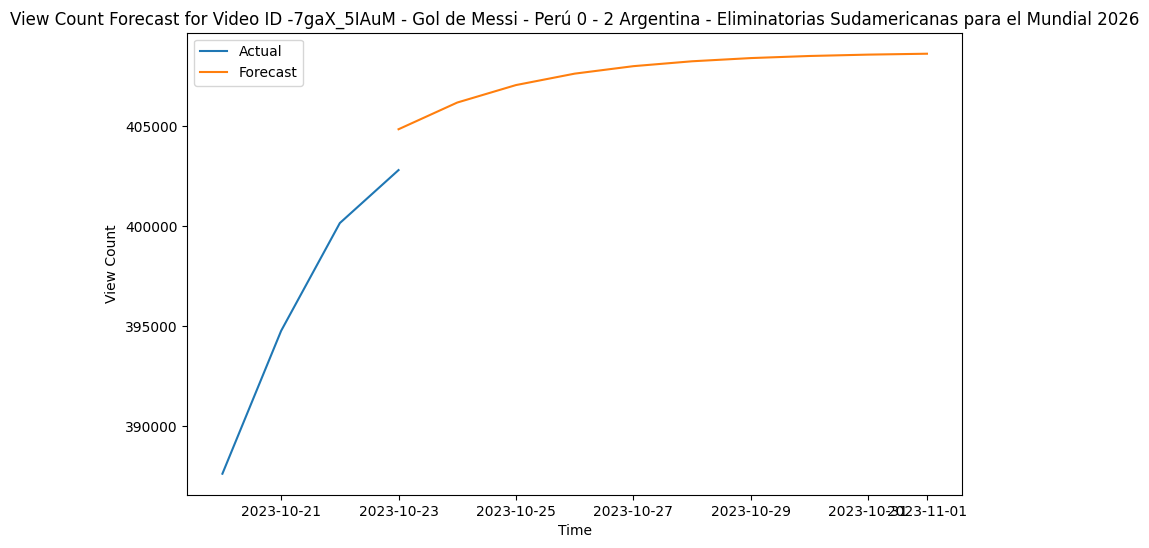

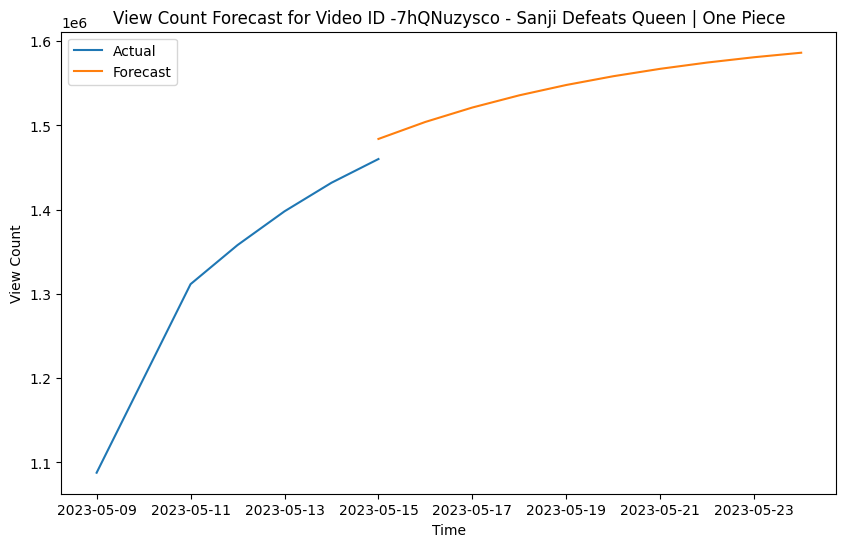

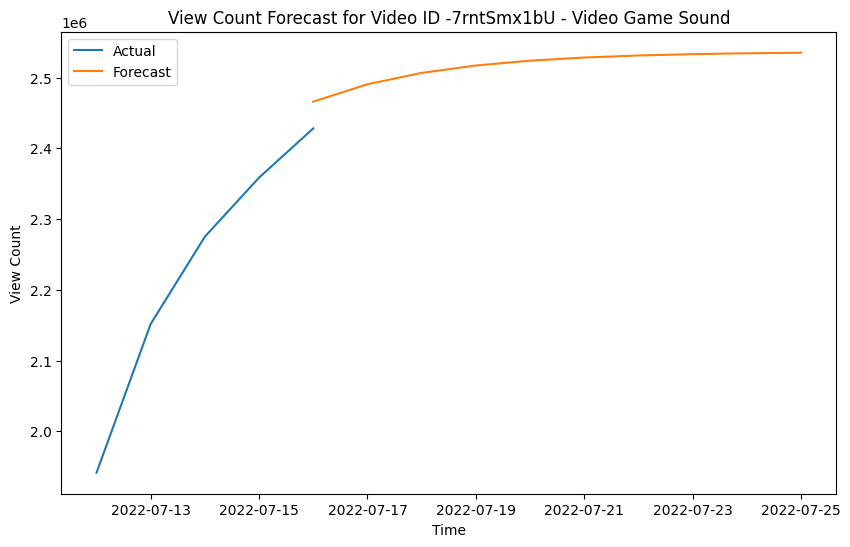

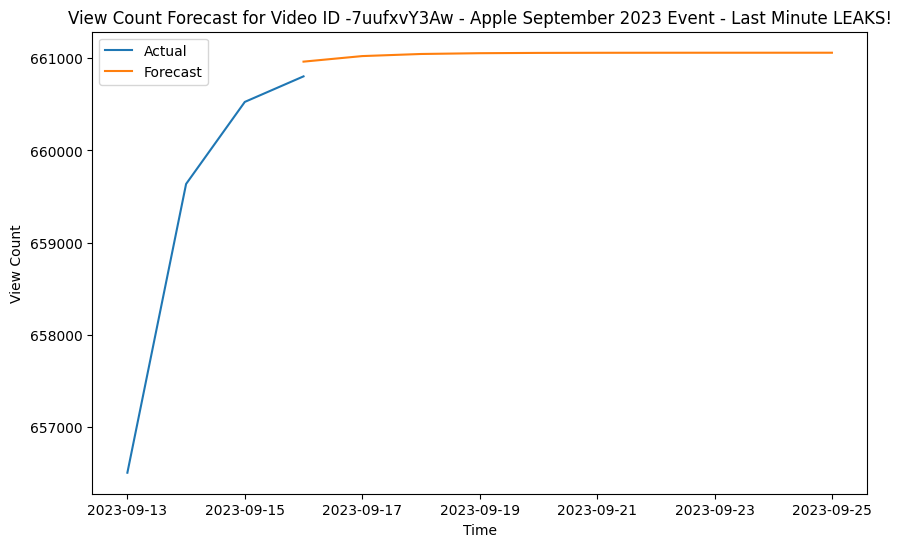

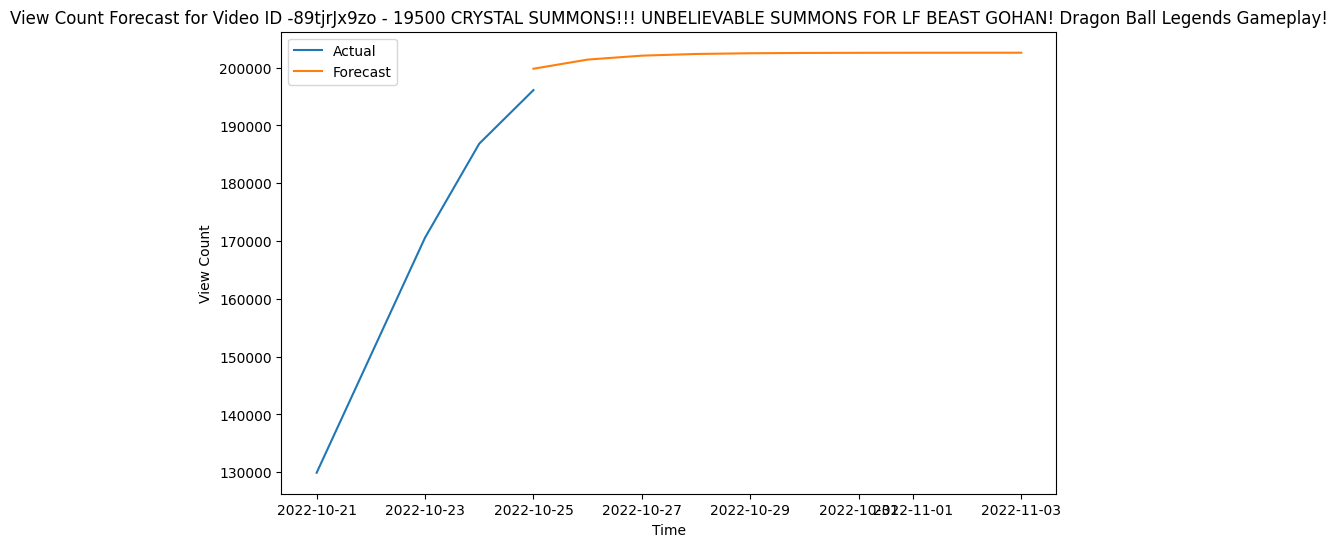

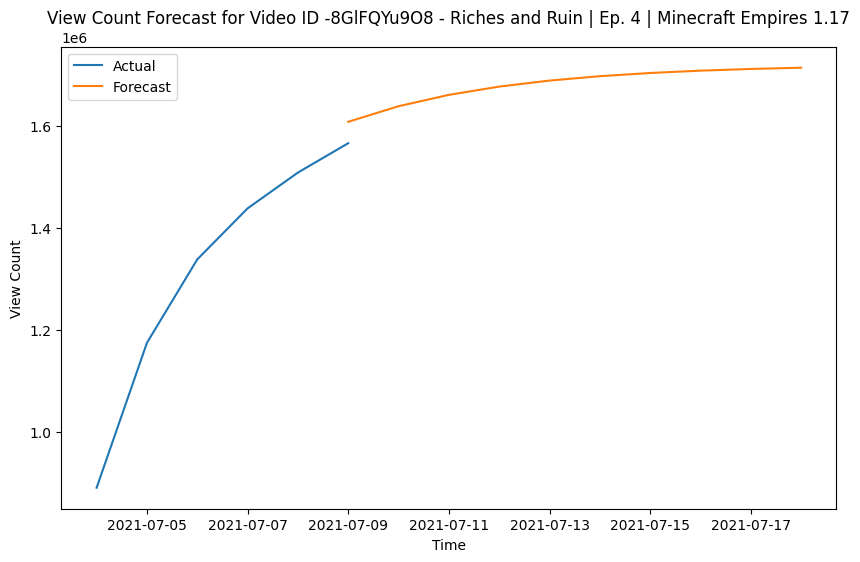

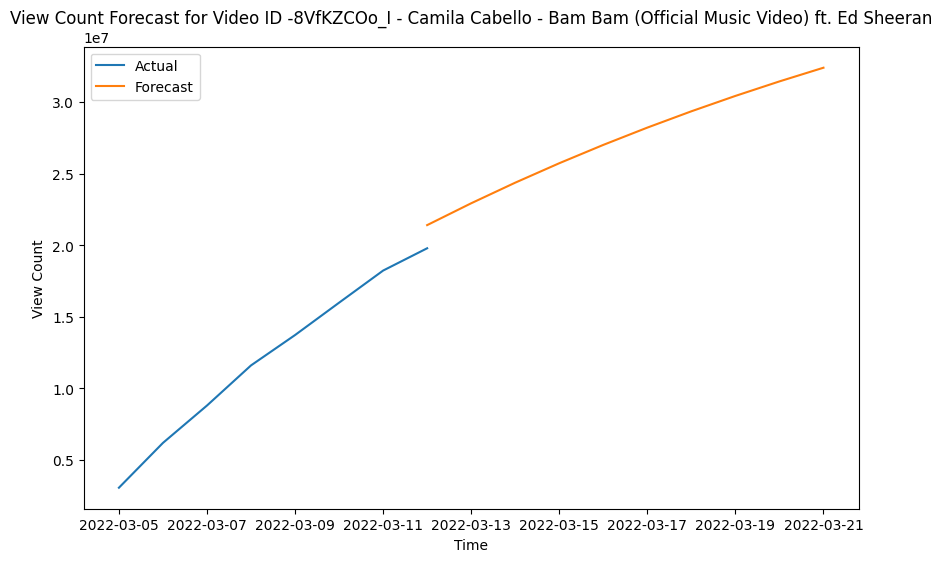

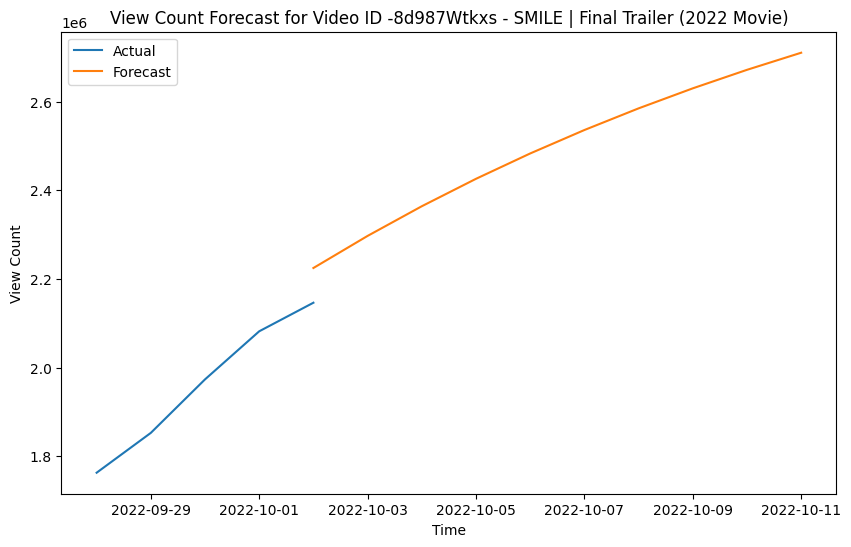

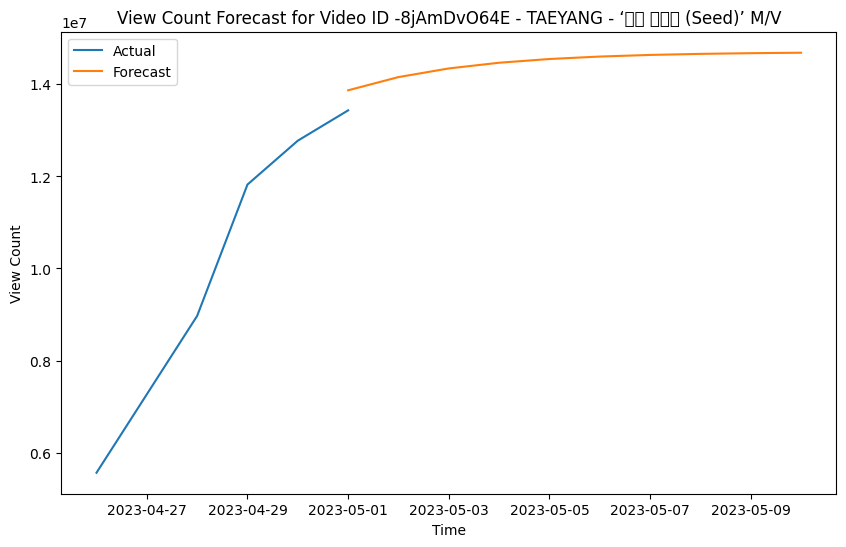

In [ ]:
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')
# try out some sort of time series model:
# treating engagement metrics as a time series for each video_id
# try to predict future engagement patterns or understand historical growth
cleaned_df['publishedAt'] = pd.to_datetime(cleaned_df['publishedAt'], errors='coerce')
cleaned_df['trending_date'] = pd.to_datetime(cleaned_df['trending_date'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['trending_date'])
cleaned_df = cleaned_df.dropna(subset=['publishedAt'])

for video_id, group in cleaned_df.groupby('video_id'):
    video_title = group['title'].iloc[0]
    group = group.sort_values(by='trending_date').set_index('trending_date')
    cols = group.select_dtypes(include=[np.number])

    if len(cols['view_count']) > 2:
    
        # using arima model because its basic, easy to use and tune
        # should test sarima (tracking seasonal changes, may be useful!!!)
        # should test lstm-- deep learning, could also be useful
        model = sm.tsa.ARIMA(group['view_count'], order=(1, 1, 1))
        # hyperparameters not tuned, using typical p=1, d=1, q=1
        model_fit = model.fit()
    
        forecast = model_fit.forecast(steps=10)
    
        plt.figure(figsize=(10, 6))
        plt.plot(group['view_count'], label='Actual')
        plt.plot(pd.date_range(group.index[-1], periods=10, freq='D'), forecast, label='Forecast')
        
        plt.title(f"View Count Forecast for Video ID {video_id} - {video_title}")
        plt.xlabel('Time')
        plt.ylabel('View Count')
        plt.legend()
        plt.show()

#### How to deal with non-numeric data?

- video titles
- descriptions
- tags
- category names

Lauren's observations show that this may be a dead end.

Trying TF-IDF feature engineering technique.

#### Incomplete. Need to clean datetime data and resolve model_fit errors.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize title, description, and tags
vectorizer_title = TfidfVectorizer(max_features=100)
title_tfidf = vectorizer_title.fit_transform(cleaned_df['title'].fillna(''))

vectorizer_desc = TfidfVectorizer(max_features=200)
desc_tfidf = vectorizer_desc.fit_transform(cleaned_df['description'].fillna(''))

vectorizer_tags = TfidfVectorizer(max_features=100)
tags_tfidf = vectorizer_tags.fit_transform(cleaned_df['tags'].fillna(''))

# convert sparse matrix to DataFrame
title_tfidf_df = pd.DataFrame(title_tfidf.toarray(), columns=vectorizer_title.get_feature_names_out())
desc_tfidf_df = pd.DataFrame(desc_tfidf.toarray(), columns=vectorizer_desc.get_feature_names_out())
tags_tfidf_df = pd.DataFrame(tags_tfidf.toarray(), columns=vectorizer_tags.get_feature_names_out())

# concatenate these TF-IDF features with the original dataframe
text_df = pd.concat([cleaned_df, title_tfidf_df, desc_tfidf_df, tags_tfidf_df], axis=1)

In [ ]:
# combine numeric and engineered text features
numeric_cols = group.select_dtypes(include=[np.number])
text_df['publishedAt'] = pd.to_datetime(text_df['publishedAt'], errors='coerce')
text_df['trending_date'] = pd.to_datetime(text_df['trending_date'], errors='coerce')
text_df = text_df.dropna(subset=['trending_date'])
text_df = text_df.dropna(subset=['publishedAt'])
X = pd.concat([text_df[numeric_cols], title_tfidf_df, desc_tfidf_df, tags_tfidf_df, text_df.filter(like='category_name_')], axis=1)

for t in text_df.dtypes:
    print(t)

# i use view count here
# but we should try to calculate some aggregate engagement score
y = text_df['view_count']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# trying random forest, could also use XGBoost
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

important_features